## PROJECT TEAM ID : " PTID-CDS-FEB-24-1815"

# PRCP-1022-HospitalStayPred

# Business Case:-Based on given features we need to find length of Stay(in day) of patient entering the Hospital

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading the data
data=pd.read_csv("HealthCareAnalytics.csv")

In [3]:
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


## Basic Check

In [4]:
# Getting the first five rows
data.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449,Nov-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056,31-40


In [5]:
# getting last rows
data.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,Nov-20,4752,0-10


In [6]:
data.shape

(318438, 18)

# Task 1:- Prepare a complete data analysis report on the given data

In [7]:
# Getting the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [8]:
# it will give you the info about numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276847,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available_Extra_Rooms_in_Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed_Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors_with_Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0


In [9]:
# It will give you the info about categorical data
data.describe(include="O")

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


In [10]:
data.describe(exclude="O")

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [11]:
# List of columns
data.columns.to_list()

['case_id',
 'Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Available_Extra_Rooms_in_Hospital',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Bed_Grade',
 'patientid',
 'City_Code_Patient',
 'Type_of_Admission',
 'Severity_of_Illness',
 'Visitors_with_Patient',
 'Age',
 'Admission_Deposit',
 'Stay']

In [12]:
# checking data type
data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available_Extra_Rooms_in_Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity_of_Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object

In [13]:
# Null value
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

* Bed_Grade and City_Code_Patient has null values

# Exploratory Data Analysis

## Univariate Analysis

**Categorical Data**:-
* Hospital_type_code,Hospital_region_code,Department,Ward_Type,Wad_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay 

**Numerical Data**:-
* case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit

In [14]:
# All integer features
data.dtypes[data.dtypes=="int64"]

case_id                              int64
Hospital_code                        int64
City_Code_Hospital                   int64
Available_Extra_Rooms_in_Hospital    int64
patientid                            int64
Visitors_with_Patient                int64
Admission_Deposit                    int64
dtype: object

In [15]:
data.dtypes[data.dtypes=="float"]

Bed_Grade            float64
City_Code_Patient    float64
dtype: object

In [16]:
data.dtypes[data.dtypes=="object"]

Hospital_type_code      object
Hospital_region_code    object
Department              object
Ward_Type               object
Ward_Facility_Code      object
Type_of_Admission       object
Severity_of_Illness     object
Age                     object
Stay                    object
dtype: object

In [17]:
Numerical_data=data[["case_id","Hospital_code","City_Code_Hospital","Available_Extra_Rooms_in_Hospital","patientid","Visitors_with_Patient","Admission_Deposit",
         "City_Code_Patient"]]
categorical_data=data[["Hospital_type_code","Hospital_region_code","Department","Ward_Type","Ward_Facility_Code","Type_of_Admission","Severity_of_Illness",
           "Age","Stay","Bed_Grade"]]

In [18]:
Numerical_data

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,patientid,Visitors_with_Patient,Admission_Deposit,City_Code_Patient
0,1,8,3,3,31397,2,4911,7.0
1,2,2,5,2,31397,2,5954,7.0
2,3,10,1,2,31397,2,4745,7.0
3,4,26,2,2,31397,2,7272,7.0
4,5,26,2,2,31397,2,5558,7.0
...,...,...,...,...,...,...,...,...
318433,318434,6,6,3,86499,3,4144,23.0
318434,318435,24,1,2,325,4,6699,8.0
318435,318436,7,4,3,125235,3,4235,10.0
318436,318437,11,2,3,91081,5,3761,8.0


In [19]:
categorical_data

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay,Bed_Grade
0,c,Z,radiotherapy,R,F,Emergency,Extreme,51-60,0-10,2.0
1,c,Z,radiotherapy,S,F,Trauma,Extreme,51-60,41-50,2.0
2,e,X,anesthesia,S,E,Trauma,Extreme,51-60,31-40,2.0
3,b,Y,radiotherapy,R,D,Trauma,Extreme,51-60,41-50,2.0
4,b,Y,radiotherapy,S,D,Trauma,Extreme,51-60,41-50,2.0
...,...,...,...,...,...,...,...,...,...,...
318433,a,X,radiotherapy,Q,F,Emergency,Moderate,41-50,Nov-20,4.0
318434,a,X,anesthesia,Q,E,Urgent,Moderate,81-90,31-40,4.0
318435,a,X,gynecology,R,F,Emergency,Minor,71-80,Nov-20,4.0
318436,b,Y,anesthesia,Q,D,Trauma,Minor,Nov-20,Nov-20,3.0


# Univeriate Analysis

In [20]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights
* Above visualization we found univariant analysis using ** Sweetviz** in that 'Case_id' and 'Patienid' are uniform distribution all value same there is no variation 
* DataFrameNO 318438 -ROWS,0-DUPLICATES,198.7 MBRAM,18-FEATURES,10-CATEGORICAL,8-NUMERICAL,0-TEXT

### Numerical Data

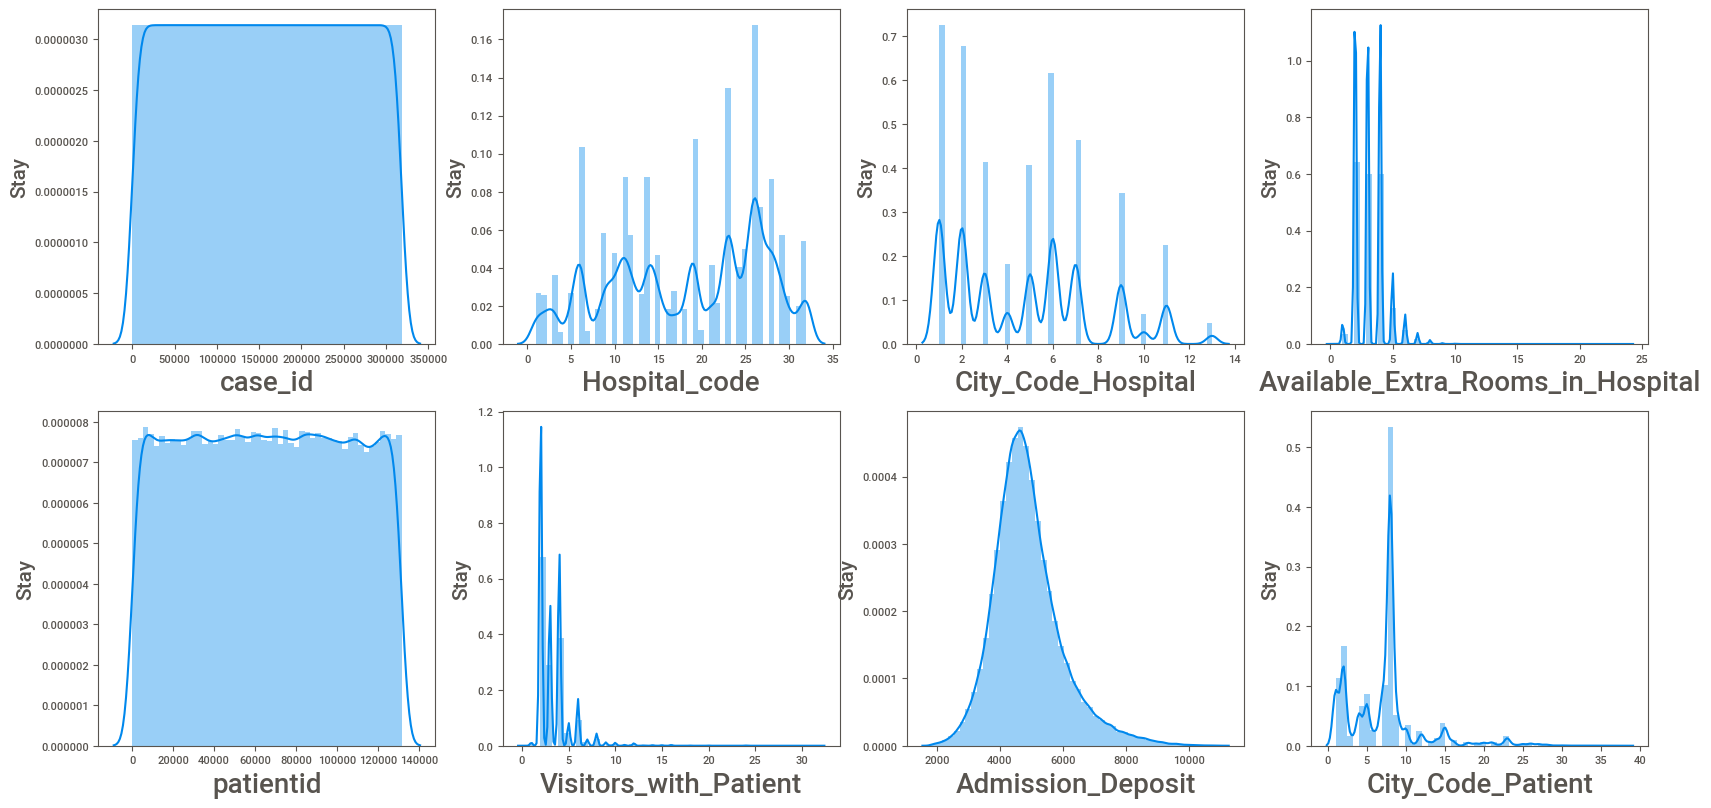

In [21]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for columns in Numerical_data:
    sb=plt.subplot(4,4,plotnumber)
    sns.distplot(x=Numerical_data[columns])
    plt.xlabel(columns,fontsize=20)
    plt.ylabel("Stay",fontsize=15)
    plotnumber+=1
plt.tight_layout(pad=100)

### Insights

* Distplot is used for distribution of continous data.


* **Case Id**:-From the above graphs we can tell that case_id is uniform and there is no variation in that columns.


* **patientid**:-From the above displot we can tell that patientid is uniform there is no variation in that columns


* **Admission_deposit**:-From the above displot we can tell that aadmission_deposit shows normal distribution.


* **Hospital_code**:-From the above displot we can tell that it is skewed.


* **city_code_hospital**:-From the above displot we can tell that it is skewed.


* **Available_extra_rooms_in_hosp**:-From the above displot we can tell that it is skewed.


* **visitors_with_patient**:-From the above displot we can tell that the graph is skewed.


* **city_code_patient**:-From the above displot we can tell that it is skewed.

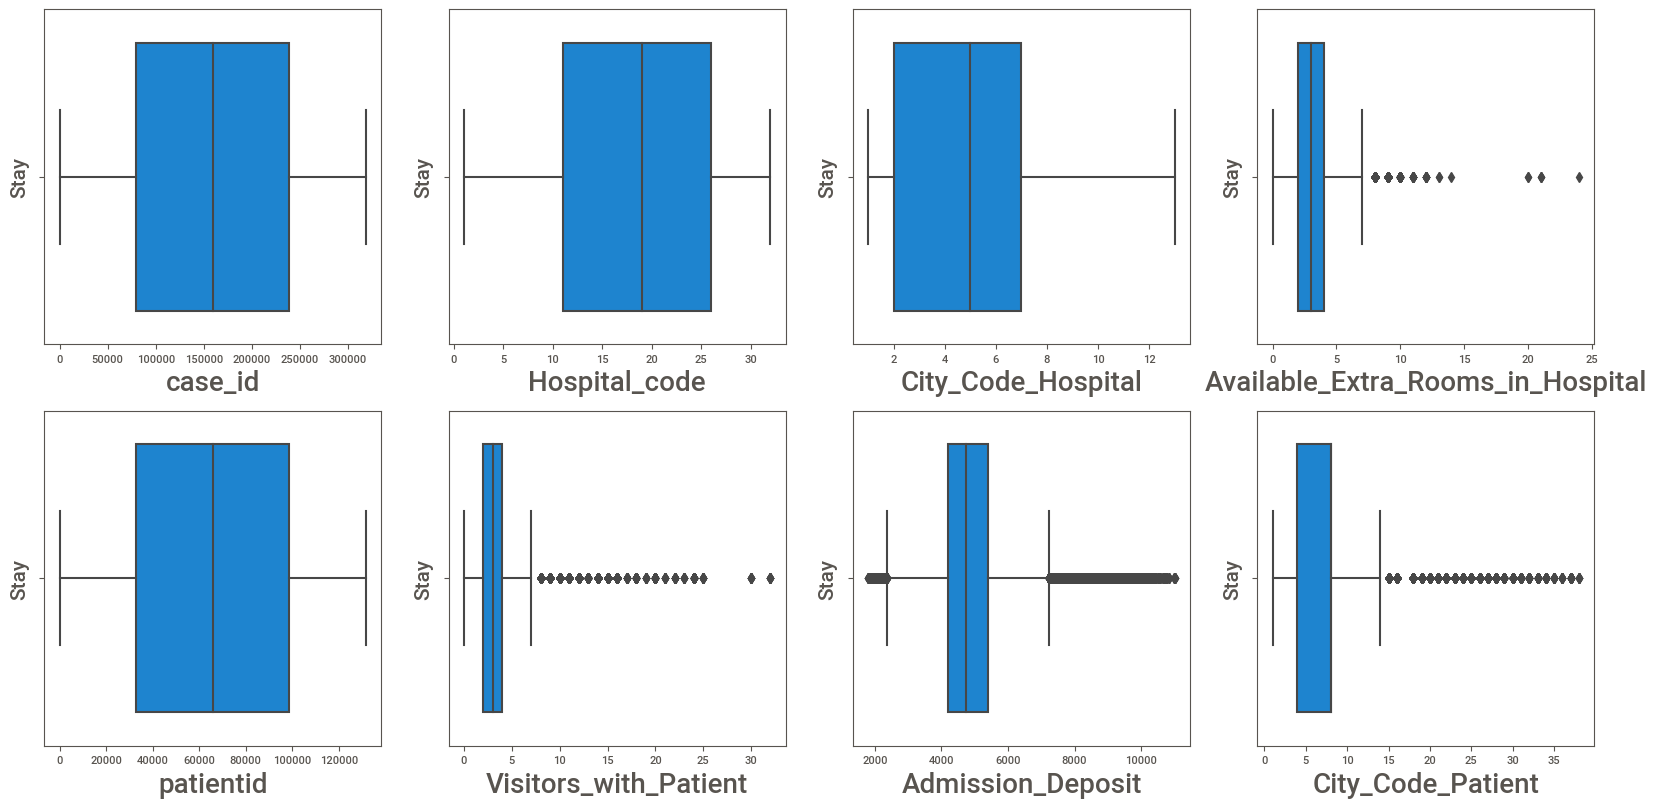

In [22]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for columns in Numerical_data:
    sb=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=Numerical_data[columns])
    plt.xlabel(columns,fontsize=20)
    plt.ylabel("Stay",fontsize=15)
    plotnumber+=1
plt.tight_layout(pad=100)

### Insights

* Boxplot is used for disrtibution of numerical data.


* **Case Id**:-boxplot for case_id has no outliers, this indicates that all data points for that variable fall within a        relatively tight range, suggesting uniformity and consistency in the data distribution for that feature.


* **patientid**:-boxplot for this column reveals no outliers, this indicates that all data points for that variable fall within a relatively tight range, suggesting uniformity and consistency in the data distribution for that feature.


* **Admission_deposit**:-From the above boxplot the parameter has no outliers,data is close together and there aren't any values that stand out as being much higher or lower than the rest


* **Hospital_code**:-the boxplot shows that all the data points are close together and none are unusually high or low and has no ouliers.


* **city_code_hospital**:-In this column's boxplot, every data point fits neatly within the expected range, with no unusually high or low values that has no outliers.


* **Available_extra_rooms_in_hosp**:-From the above boxplot this column consists of outlier.


* **visitors_with_patient**:-From the above boxplot this parameter has outlier.


* **city_code_patient**:From the above boxplot this parameter has outlier.



### Categorical Data

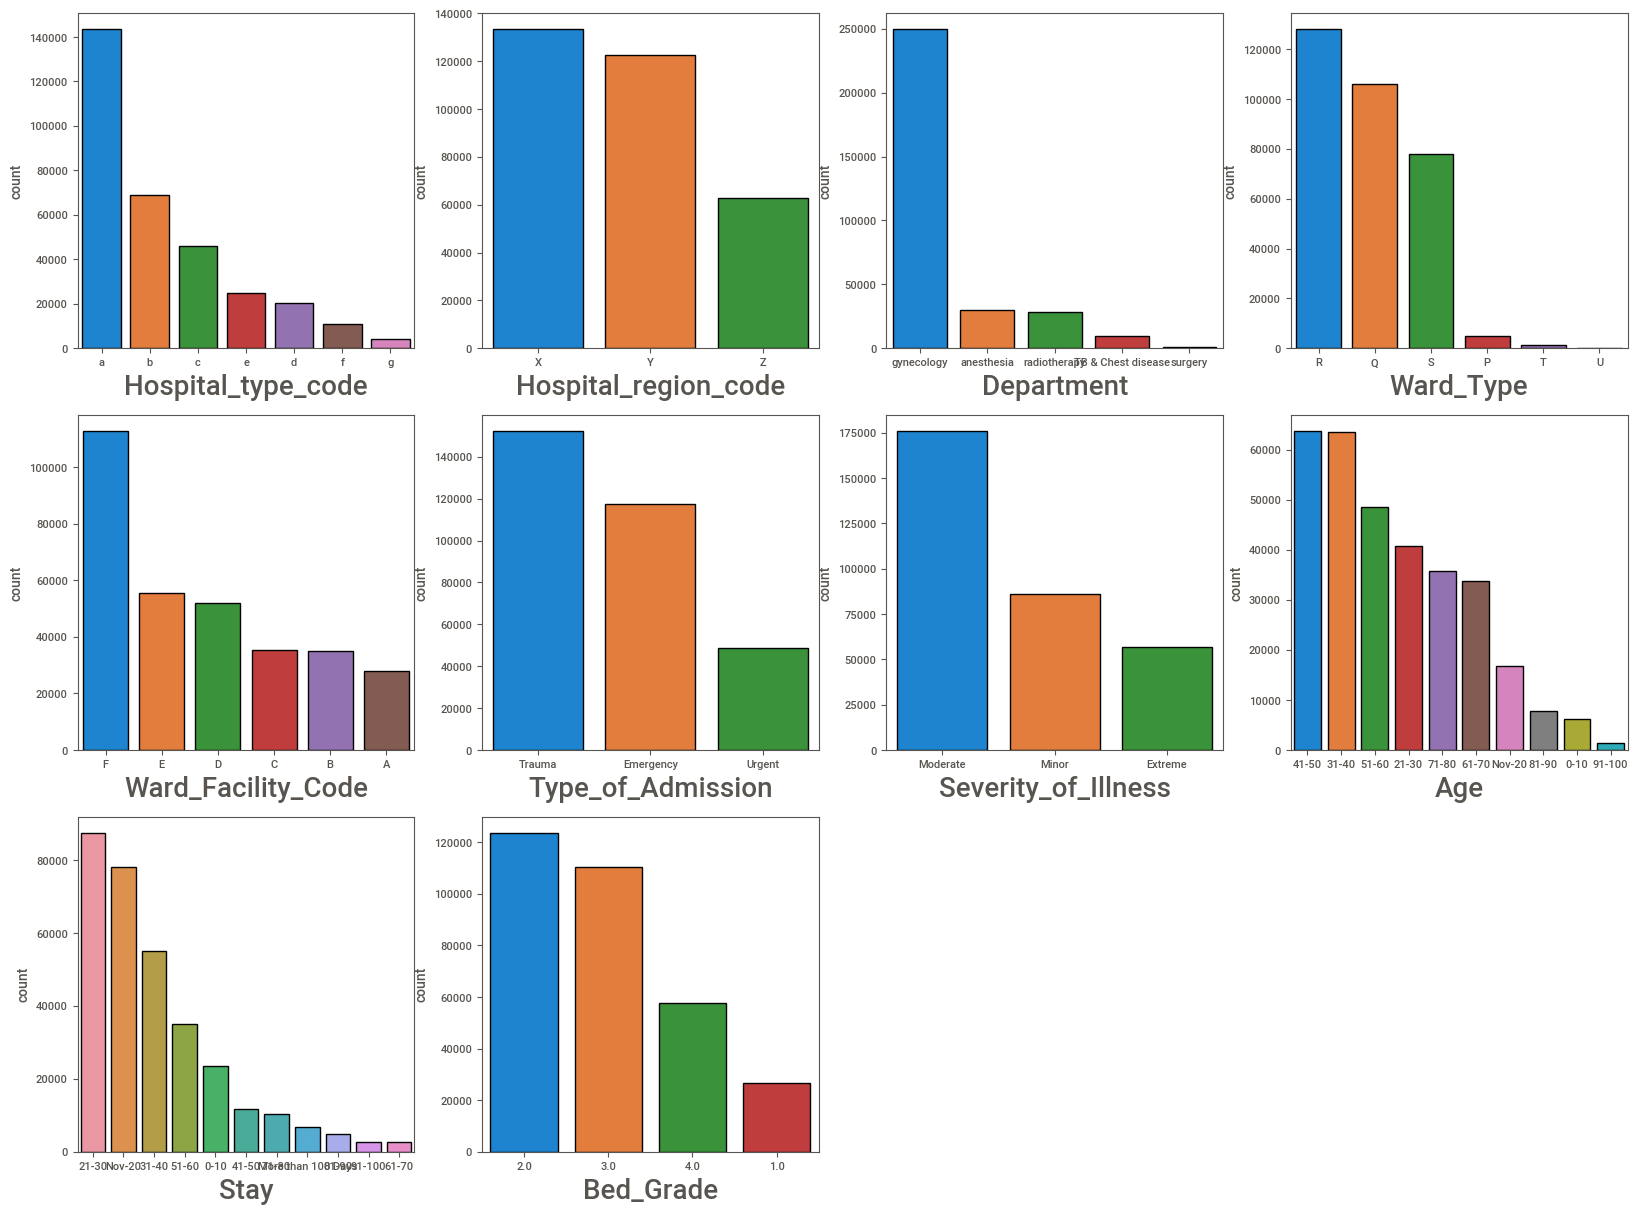

In [23]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for columns in categorical_data:
    sb=plt.subplot(4,4,plotnumber)
    sns.countplot(x=categorical_data[columns],order=categorical_data[columns].value_counts().index,ec='black')
    plt.xlabel(columns,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=100)

### Insights
* countplot is used for distribution of categorical data.


* **Hospital_type_code**:- In the above countplot there are 6 unique parameters then "a" column has highest count and "g" has lowest count.


* **Hospital_region_code**:-In the above countplot there are 3 unique parameters then "x" column has highest count and "z" has lowest count.


* **Department**:-In the above countplot there are 5 unique parameters then "gynecology" column has highest count and "disease surgery" has lowest count.


* **Ward_type**:-In the above countplot there are 6 unique parameters then "R" column has highest count and "U" has lowest count.


* **Ward_Facility_Code**:-In the above countplot there are 6 unique parameters then "F" column has highest count and "A" has lowest count.


* **Type_of_Admission**:-In the above countplot there are 3 unique parameters then "TRAUMA" column has highest count and "URGENT" has lowest count.


* **Severity_of_illness**:-In the above countplot there are 3 unique parameters then "Moderate" column has highest count and "Extreme" has lowest count.


* **Age**:- In the above countplot there are 10 unique parameters then "41-50" column has highest count and "91-100" has lowest count.


* **Stay**:- In the above countplot there are 10 unique parameters then "21-30" column has more than 8000 range and "61-70" column has lowest range.


* **Bed_Grade**:- In the above countplot there are 4 unique parameters then "20" column has highest count in a range of 120000 and "10" has lowest count.



# Biaveriate Analysis

### Hospital_type_code and stay

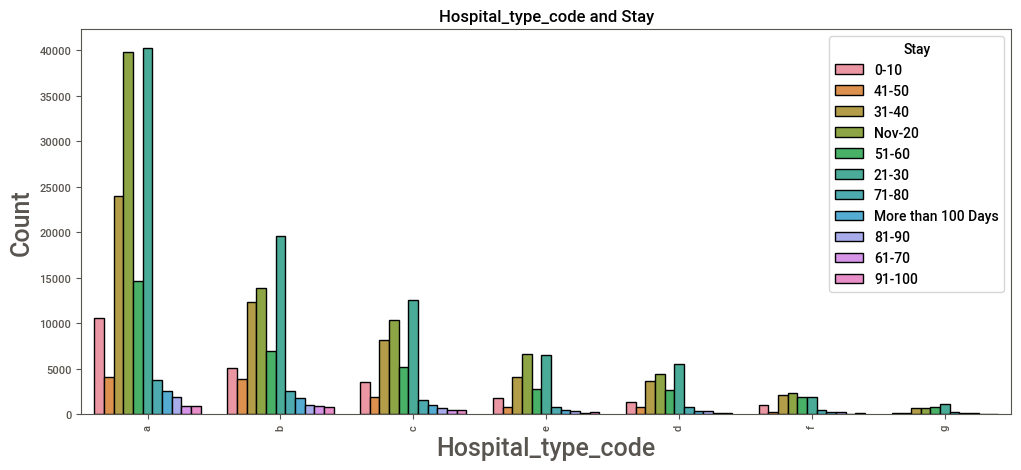

In [24]:
plt.figure(figsize=(12,5))
sns.countplot(x="Hospital_type_code",data=data,hue=data["Stay"],order=data["Hospital_type_code"].value_counts().index,ec="black")
plt.title("Hospital_type_code and Stay",color='black')
plt.xlabel("Hospital_type_code",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights

* In Hospital_type_code 'A' is most preffered for staying
* In a importent with patient will stay up to 21-30 and 20 days 
* But 'G' has least staying vlaue 

### Hospital_region_code and Stay

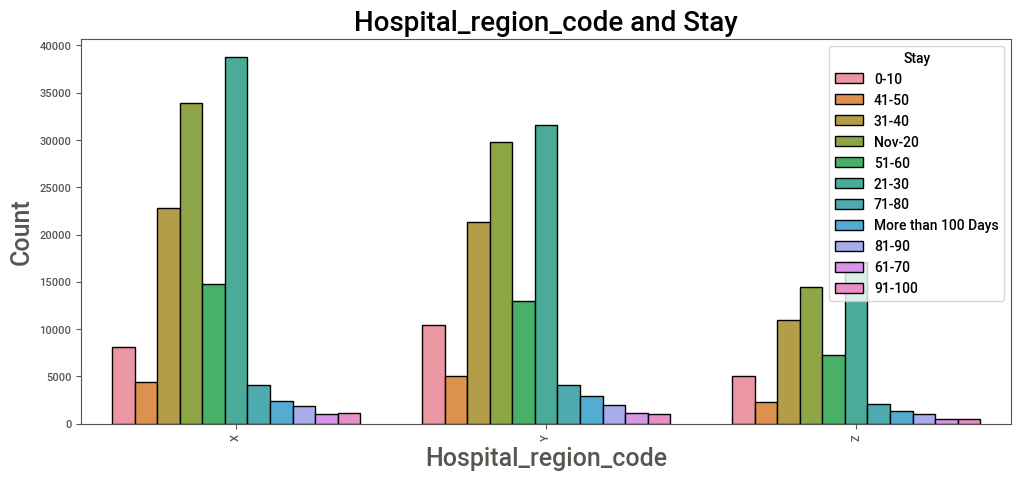

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(x="Hospital_region_code",data=data,hue=data["Stay"],order=data["Hospital_region_code"].value_counts().index,ec="black")
plt.title("Hospital_region_code and Stay", fontsize=20, color='black')
plt.xlabel("Hospital_region_code",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights

* Above plot showing Hospital_region_code in 3 unique value is there x,y,z 
* In X most of patient will stay up to 71-80 days totaly 38000 near and and least 61-70 days totaly 2000 
* In Y most of patient will stay up to 71-80 totaly 30000 patients and least 61-70 days 2000 patient

### Department and Stay

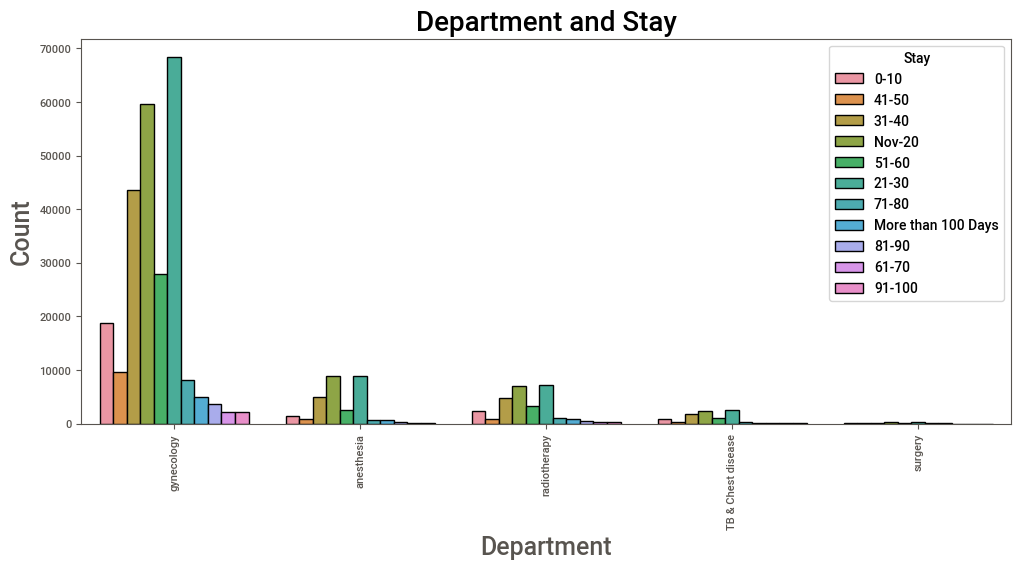

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x="Department",data=data,hue=data["Stay"],order=data["Department"].value_counts().index,ec="black")
plt.title("Department and Stay", fontsize=20, color='black')
plt.xlabel("Department",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* Above visualization we got 'gynecology' has highest count 68000 patients will saty 21-30  days fallowed by 'anesthesia'
* Lowest is 'surgery',surgery patients are very less counts means less then 100 patient will stay

### Ward_Type and Stay

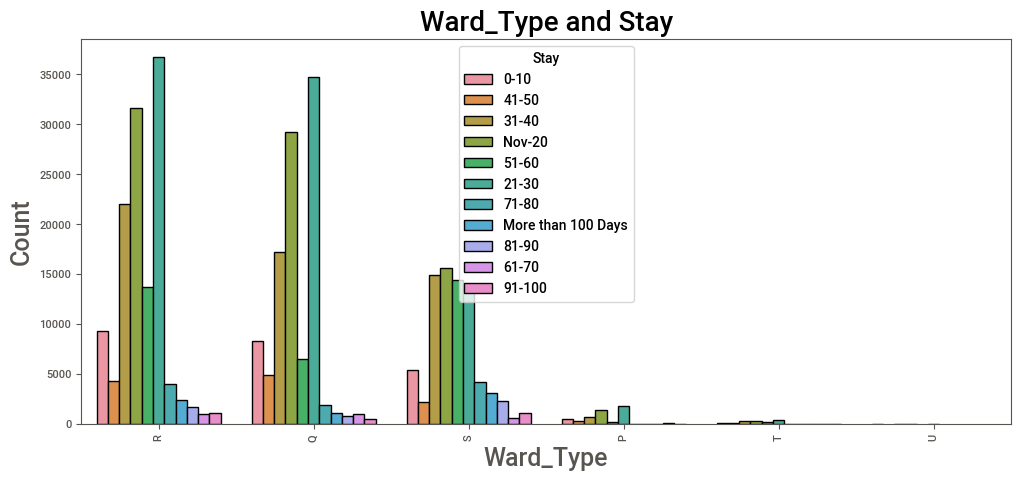

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x="Ward_Type",data=data,hue=data["Stay"],order=data["Ward_Type"].value_counts().index,ec="black")
plt.title("Ward_Type and Stay", fontsize=20, color='black')
plt.xlabel("Ward_Type",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights

* We have 6 type of Wards in that 'R' has highest patients stays in that maximum 21-30 days above 35000 patients will stay fallowed by 'Q'
* least count is 'U' ward, it has very less patient stay means 100  

### Ward_Facility_Code and Stay

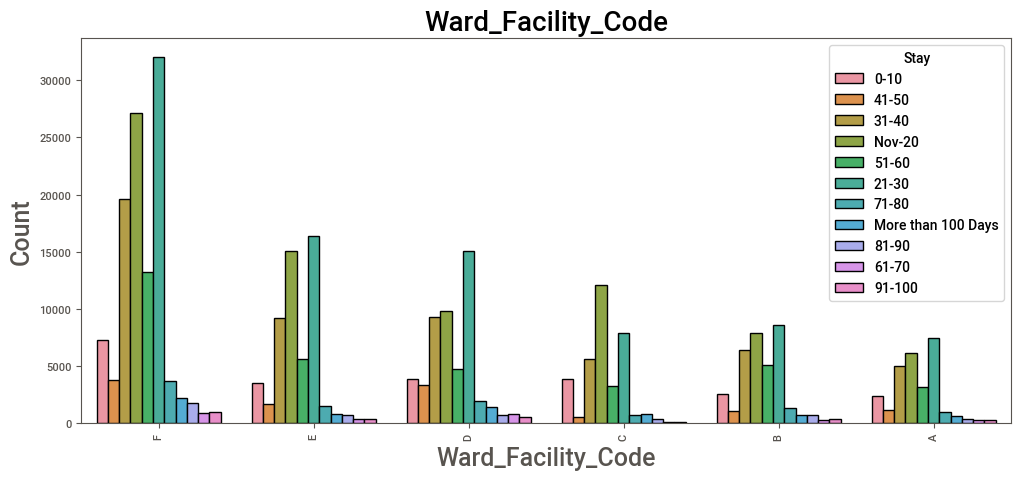

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(x="Ward_Facility_Code",data=data,hue=data["Stay"],order=data["Ward_Facility_Code"].value_counts().index,ec="black")
plt.title("Ward_Facility_Code", fontsize=20, color='black')
plt.xlabel("Ward_Facility_Code",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* In ward_Facility_code there are 6 values in taht 'F' has highest and above 35000 patients will stay 21-30 days fallowed by 'E'
* least count is 'A' that has only 5000 patient will stay 21-30 days

### Type_of_Admission and Stay

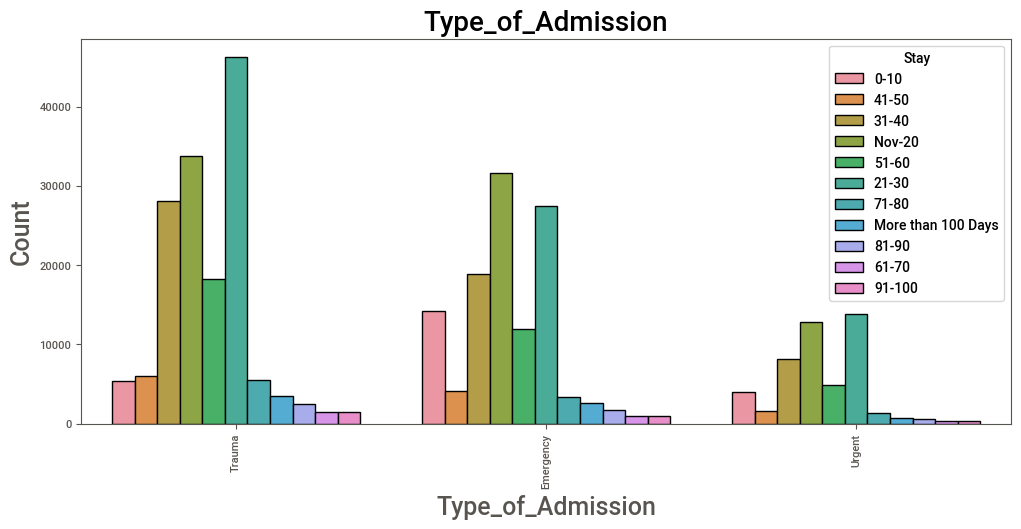

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(x="Type_of_Admission",data=data,hue=data["Stay"],order=data["Type_of_Admission"].value_counts().index,ec="black")
plt.title("Type_of_Admission", fontsize=20, color='black')
plt.xlabel("Type_of_Admission",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* In Type_of_Admission has 3 unique value 'Trauma','Emergency' and 'urgent'
* highest patient will stay in Trauma with different days ,in that 21-30 is highest patient
* Followed by 'Emergency'
* least Admission is 'Urgent'

### Severity_of_Illness and Stay

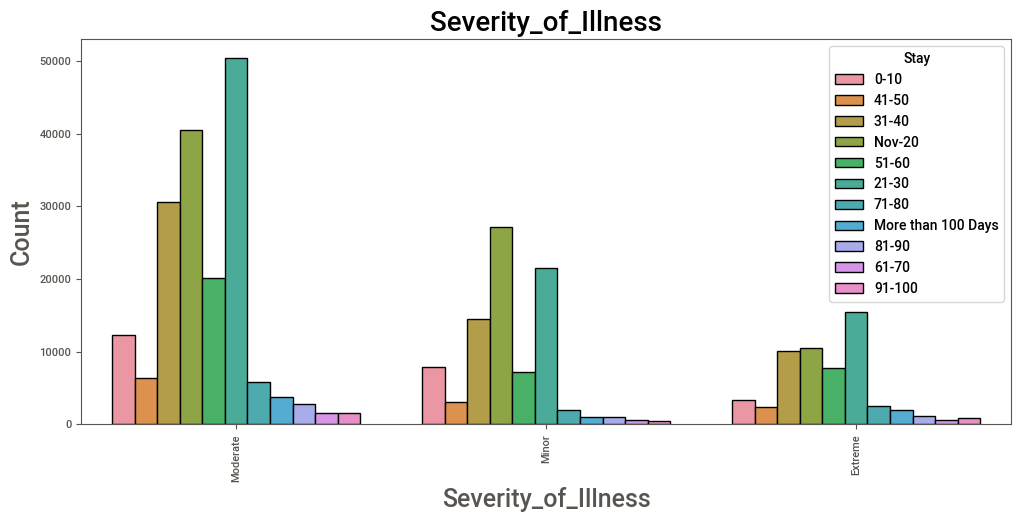

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(x="Severity_of_Illness",data=data,hue=data["Stay"],order=data["Severity_of_Illness"].value_counts().index,ec="black")
plt.title("Severity_of_Illness", fontsize=20, color='black')
plt.xlabel("Severity_of_Illness",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* 'Severity_of_illness' has 3 unique value ,'Moderate','Minor','Extreme'
*  In that 'Moderate' has highest patients will stay within 21-30 days counts is 50000
* Least count is 'Excreme' with only 21-30 days 15000 patients will saty

### Age and stay

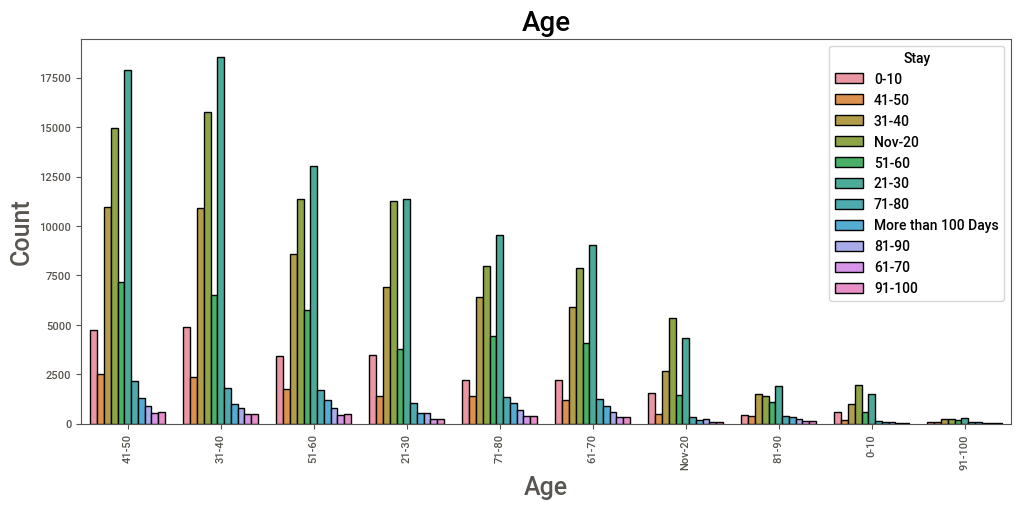

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x="Age",data=data,hue=data["Stay"],order=data["Age"].value_counts().index,ec="black")
plt.title("Age", fontsize=20, color='black')
plt.xlabel("Age",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* Patient has different Age in that 41-50 ages 17500 patient will stay within 21-30 days Followed by 31-40 ages
* Age 91-100 patient has less count 

### Bed_Grade and Stay

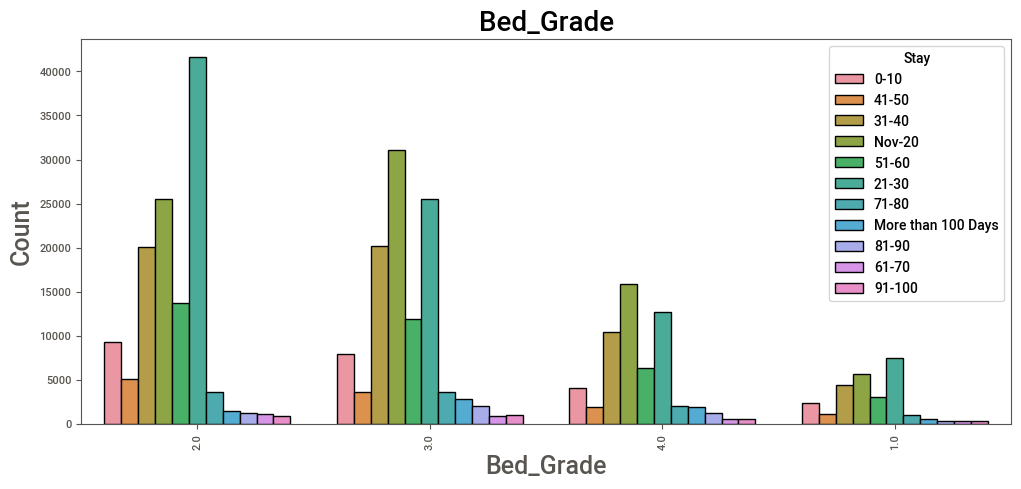

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x="Bed_Grade",data=data,hue=data["Stay"],order=data["Bed_Grade"].value_counts().index,ec="black")
plt.title("Bed_Grade", fontsize=20, color='black')
plt.xlabel("Bed_Grade",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* The count plot illustrates the distribution of patients' stays across different bed grades. It appears that certain bed grades are more commonly associated with longer stays than others. By observing the height of the bars for each bed grade category, we can discern the relative frequency of different stay durations within each grade. This insight could potentially inform hospital management decisions, such as resource allocation or patient prioritization strategies, based on bed grade assignments. Additionally, the ordering of bed grades provides insight into their popularity or utilization within the hospital, with the most frequently assigned grades appearing first.

# Data Preprocessing 

## Feature Engineering 

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

## Case_id

In [34]:
data.case_id.value_counts()

1         1
212290    1
212297    1
212296    1
212295    1
         ..
106146    1
106145    1
106144    1
106143    1
318438    1
Name: case_id, Length: 318438, dtype: int64

In [35]:
data.case_id.isnull().sum()

0

In [36]:
data.case_id.unique()

array([     1,      2,      3, ..., 318436, 318437, 318438], dtype=int64)

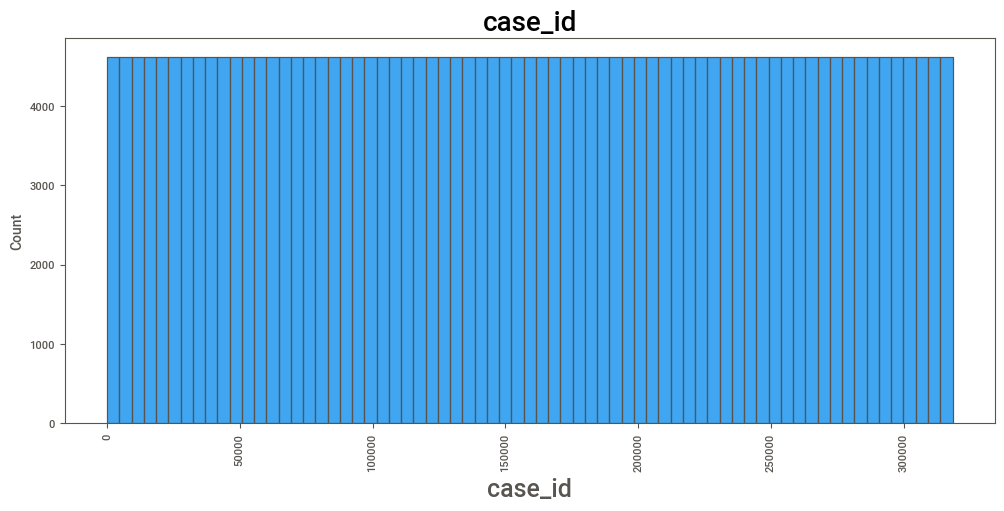

In [37]:
plt.figure(figsize=(12,5))
sns.histplot(x="case_id",data=data)
plt.title("case_id", fontsize=20, color='black')
plt.xlabel("case_id",fontsize=18)
plt.xticks(rotation=90)
plt.show()

### Insights
* case_id contain uniform distribution
* it is not much usefull our model 
* we going to drop this column

In [38]:
data.drop('case_id',axis=1,inplace=True)

In [39]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


## Hospital_code

In [40]:
# value_counts of Hospital_code
data.Hospital_code.value_counts()

26    33076
23    26566
19    21219
6     20425
11    17328
14    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: int64

In [41]:
# ckecking null values
data.Hospital_code.isnull().sum()

0

In [42]:
# Unique value
data.Hospital_code.unique()

array([ 8,  2, 10, 26, 23, 32,  1, 22, 16,  9,  6, 29, 12,  3, 21, 28, 27,
       19,  5, 14, 13, 31, 24, 17, 25, 15, 11, 30, 18,  4,  7, 20],
      dtype=int64)

In [43]:
# Checking datatype
data.Hospital_code.dtypes

dtype('int64')

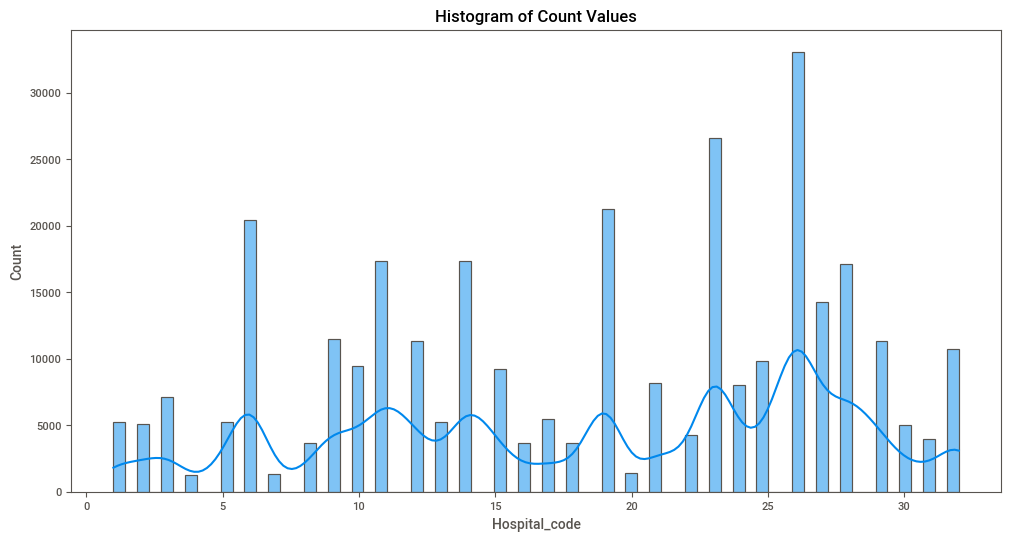

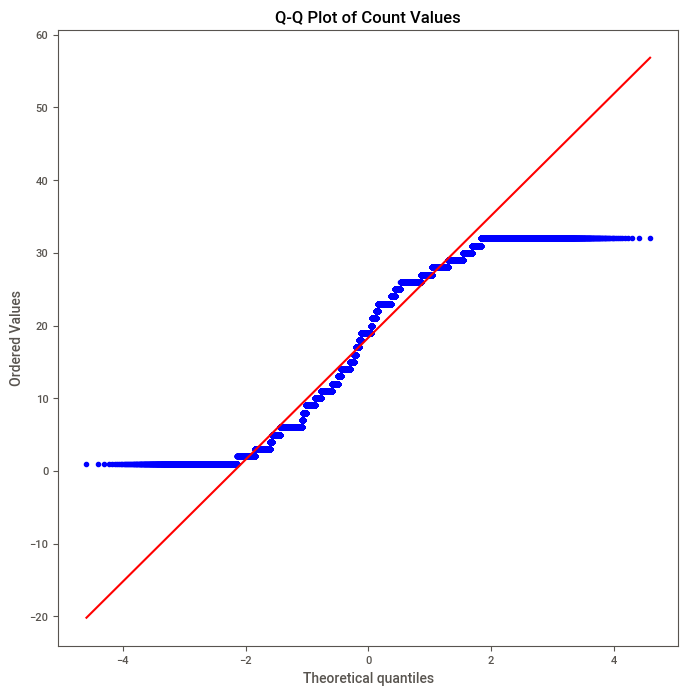

In [44]:
from scipy.stats import probplot

# Assuming your data is in a pandas DataFrame

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Hospital_code'], kde=True)
plt.title('Histogram of Count Values')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
probplot(data['Hospital_code'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Count Values')
plt.show()

### Insights
* Hospital_code has skewed data
* we have to convert it into normal distribution

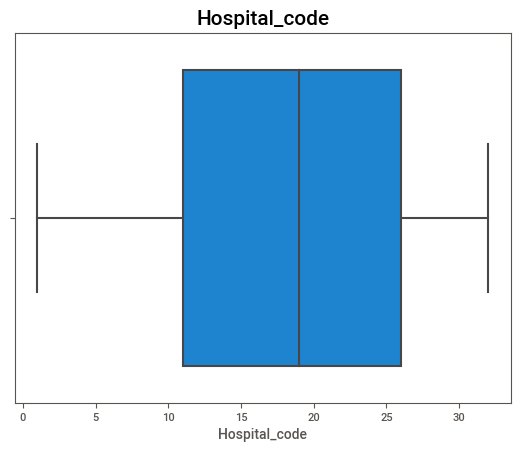

In [45]:
sns.boxplot(data['Hospital_code'])
plt.title('Hospital_code',fontsize=15)
plt.show()

### Log,Square,Box Cox transformation

log_transformation p-value:NormaltestResult(statistic=65777.48317079726, pvalue=0.0)
Box_Cox Transformation p-value:NormaltestResult(statistic=148974.89759181294, pvalue=0.0)
Square_transformation p_value:NormaltestResult(statistic=294016.5394739805, pvalue=0.0)


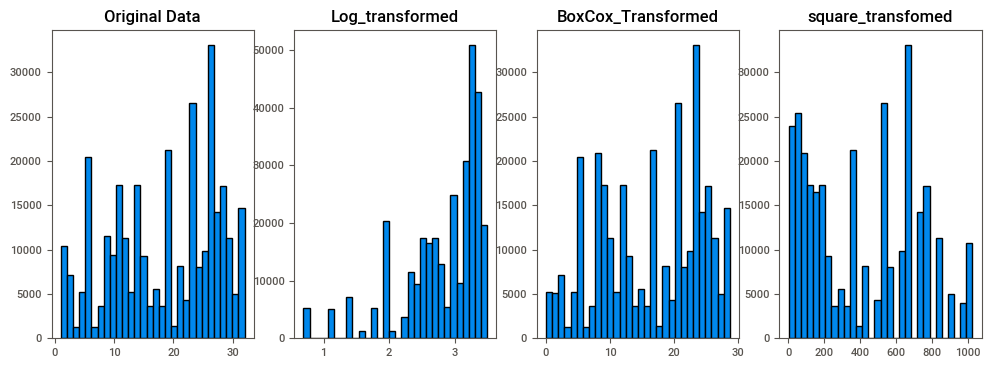

In [46]:
from scipy.stats import boxcox
from scipy.stats import normaltest

# Apply Log_transformed
log_transformed_data = np.log1p(data['Hospital_code'])

# Apply Box-Cox transformed
boxcox_transformed_data,lambda_value=boxcox(data['Hospital_code'])

# Apply square transformed
square_transformed_data=np.square(data['Hospital_code'])

# check the normality of transformed data using normality test
p_value_log=normaltest(log_transformed_data)
p_value_boxcox=normaltest(boxcox_transformed_data)
p_value_square=normaltest(square_transformed_data)

#plot histogram of original and transformed data
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.hist(data['Hospital_code'],bins=30,edgecolor='black')
plt.title('Original Data')

plt.subplot(1,4,2)
plt.hist(log_transformed_data,bins=30,edgecolor='black')
plt.title('Log_transformed')

plt.subplot(1,4,3)
plt.hist(boxcox_transformed_data,bins=30,edgecolor='black')
plt.title('BoxCox_Transformed')

plt.subplot(1,4,4)
plt.hist(square_transformed_data,bins=30,edgecolor='black')
plt.title('square_transfomed')

print(f"log_transformation p-value:{p_value_log}")
print(f"Box_Cox Transformation p-value:{p_value_boxcox}")
print(f"Square_transformation p_value:{p_value_square}")

### Reducing memory space

In [47]:
# Reduce memory space
data['Hospital_code']=pd.to_numeric(data.Hospital_code,downcast='integer')

## Hospital_type_code

In [48]:
data.Hospital_type_code.value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

In [49]:
# minimum Hospital_type_code
data.Hospital_type_code.max()

'g'

In [50]:
# maximum Hospital_type_code 
data.Hospital_type_code.min()

'a'

In [51]:
data.Hospital_type_code.unique()

array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)

In [52]:
# checking null value
data.Hospital_type_code.isnull().sum()

0

In [53]:
# datatype
data.Hospital_type_code.dtypes

dtype('O')

### mannual Encoding

In [54]:
# Replacing data to numerical
data['Hospital_type_code'].replace({'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7},inplace=True)

In [55]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,8,3,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,3,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,10,5,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,26,2,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,26,2,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,24,1,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,7,1,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,11,2,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


In [56]:
data.Hospital_type_code.value_counts()

1    143425
2     68946
3     45928
5     24770
4     20389
6     10703
7      4277
Name: Hospital_type_code, dtype: int64

## City_Code_Hospital

In [57]:
# value counts
data.City_Code_Hospital.value_counts()

1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64

In [58]:
data['City_Code_Hospital'].max()

13

In [59]:
# null value
data.City_Code_Hospital.isnull().sum()

0

In [60]:
# unique values
data.City_Code_Hospital.unique()

array([ 3,  5,  1,  2,  6,  9, 10,  4, 11,  7, 13], dtype=int64)

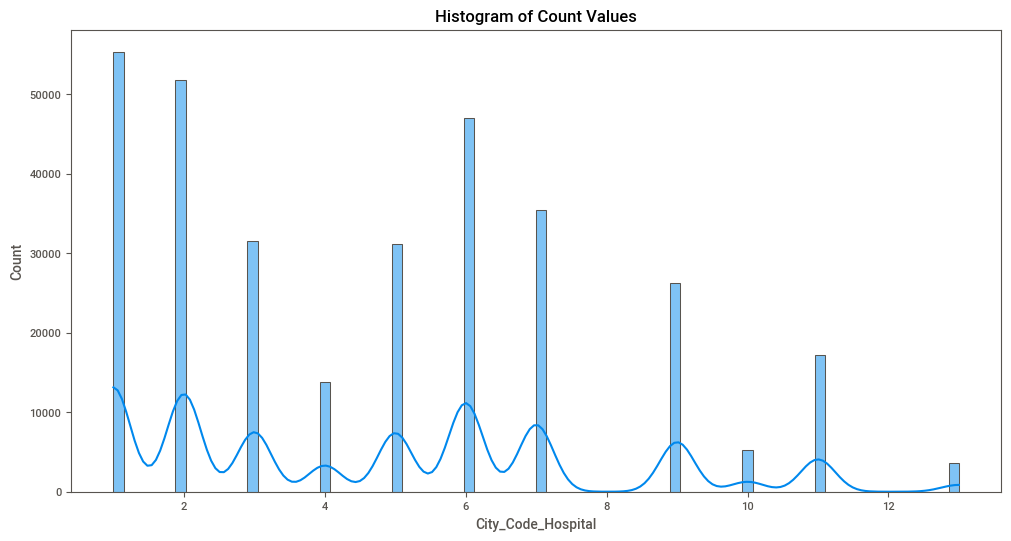

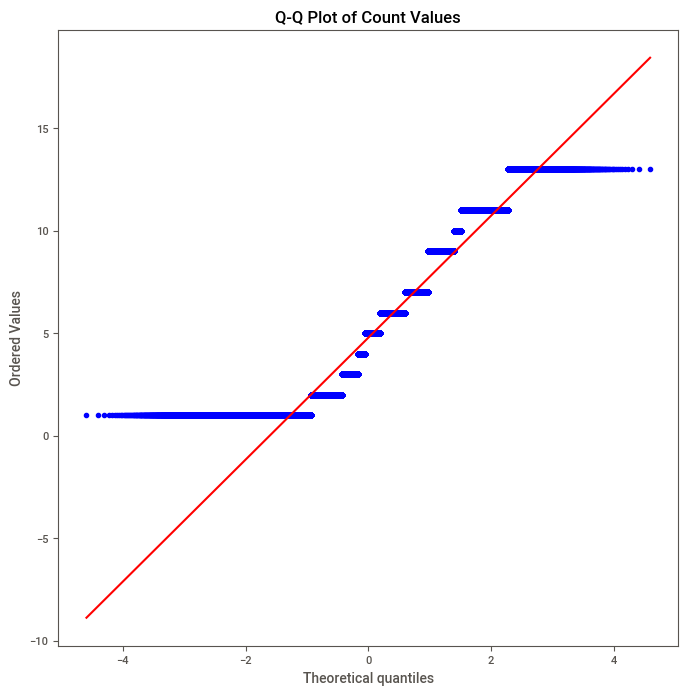

In [61]:
from scipy.stats import probplot

# Assuming your data is in a pandas DataFrame

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['City_Code_Hospital'], kde=True)
plt.title('Histogram of Count Values')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
probplot(data['City_Code_Hospital'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Count Values')
plt.show()

## Hospital_region_code

In [62]:
# value_counts
data.Hospital_region_code.value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

In [63]:
# Null value
data.Hospital_region_code.isnull().sum()

0

In [64]:
data.Hospital_region_code.unique()

array(['Z', 'X', 'Y'], dtype=object)

In [65]:
data.Hospital_region_code.dtypes

dtype('O')

### One-Hot Encoder

* Hospital_region_code contain nomial datatype
* we used one-hot encoder for Hospital_region_code replace object to numerical datatype

In [66]:
Hospital_region_code=pd.get_dummies(data['Hospital_region_code'],prefix='Hospital_region',drop_first=True)

In [67]:
data=pd.concat([data,Hospital_region_code],axis=1).drop(['Hospital_region_code'],axis=1)

In [68]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z
0,8,3,3,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10,0,1
1,2,3,5,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50,0,1
2,10,5,1,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40,0,0
3,26,2,2,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50,1,0
4,26,2,2,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20,0,0
318434,24,1,1,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40,0,0
318435,7,1,4,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20,0,0
318436,11,2,2,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20,1,0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 4   Department                         318438 non-null  object 
 5   Ward_Type                          318438 non-null  object 
 6   Ward_Facility_Code                 318438 non-null  object 
 7   Bed_Grade                          318325 non-null  float64
 8   patientid                          318438 non-null  int64  
 9   City_Code_Patient                  313906 non-null  float64
 10  Type_of_Admission                  318438 non-null  object 
 11  Severity_of_Illness                3184

## Available_Extra_Rooms_in_Hospital

In [70]:
# value counts
data.Available_Extra_Rooms_in_Hospital.value_counts()

2     98311
4     91709
3     91520
5     19288
6      7786
1      5582
7      2876
8      1027
9       218
10       67
11       17
0        15
12       13
21        3
20        2
13        2
14        1
24        1
Name: Available_Extra_Rooms_in_Hospital, dtype: int64

In [71]:
# null value
data.Available_Extra_Rooms_in_Hospital.isnull().sum()

0

In [72]:
# unique values
data.Available_Extra_Rooms_in_Hospital.unique()

array([ 3,  2,  1,  4,  6,  5,  7,  8,  9, 10, 12,  0, 11, 20, 14, 21, 13,
       24], dtype=int64)

In [73]:
data.Available_Extra_Rooms_in_Hospital.dtypes

dtype('int64')

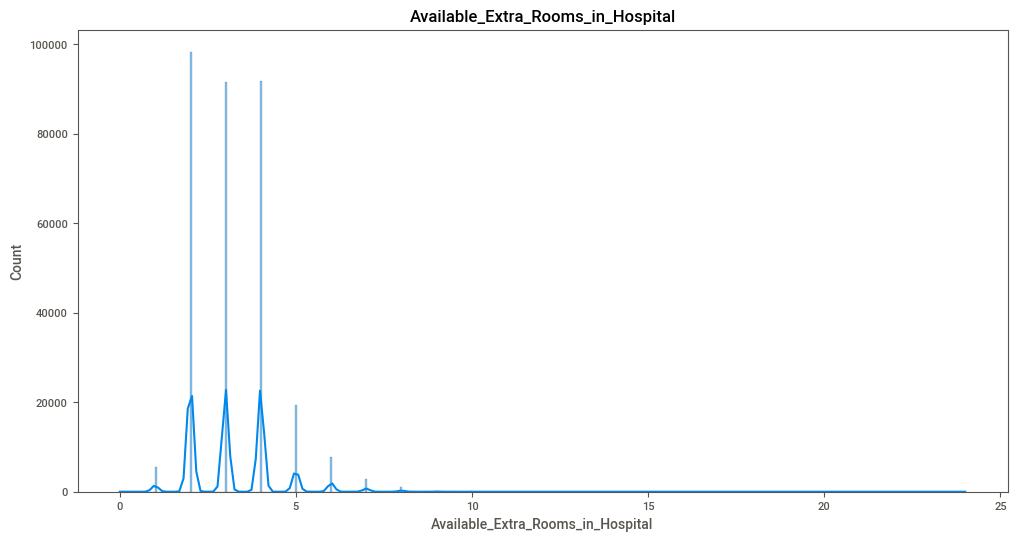

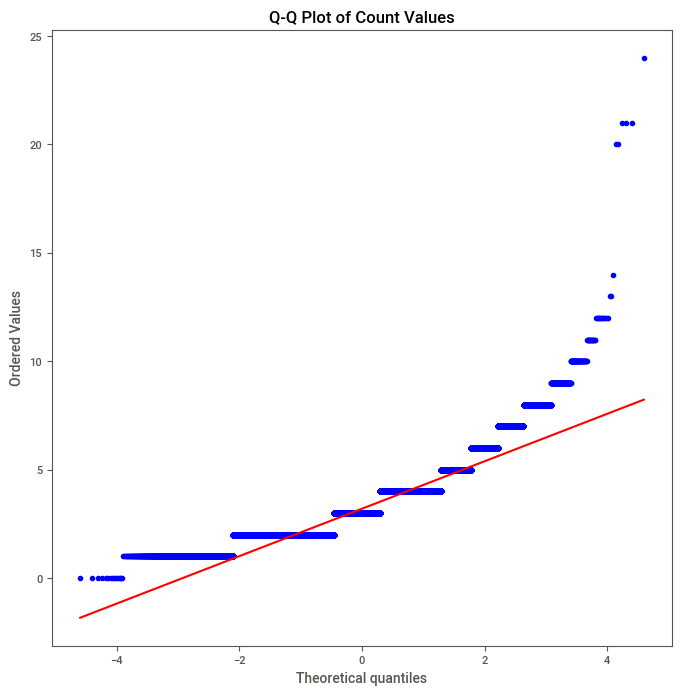

In [74]:
from scipy.stats import probplot

# Assuming your data is in a pandas DataFrame

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Available_Extra_Rooms_in_Hospital'], kde=True)
plt.title('Available_Extra_Rooms_in_Hospital')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
probplot(data['Available_Extra_Rooms_in_Hospital'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Count Values')
plt.show()

### Insights
* It is not normally distribution

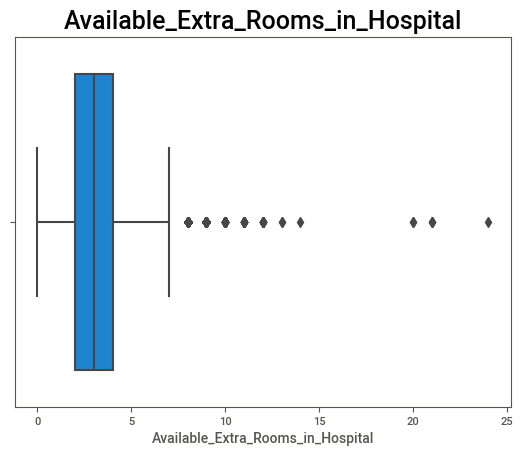

In [75]:
sns.boxplot(data['Available_Extra_Rooms_in_Hospital'])
plt.title('Available_Extra_Rooms_in_Hospital',fontsize=18)
plt.show()

### Insights
* In City_Code_Hospital there is outlier

### Handling Outlier

In [76]:
from scipy import stats
IQR=stats.iqr(data.Available_Extra_Rooms_in_Hospital,interpolation='midpoint')
IQR

2.0

In [77]:
Q1=data.Available_Extra_Rooms_in_Hospital.quantile(0.25)
print("Q1:",Q1)
Q3=data.Available_Extra_Rooms_in_Hospital.quantile(0.75)
print("Q3:",Q3)

min_limit=Q1-(1.5*IQR)
print("Min_Lim",min_limit)
max_lim=Q3+(1.5*IQR)
print("Max_Lim",IQR)

Q1: 2.0
Q3: 4.0
Min_Lim -1.0
Max_Lim 2.0


In [78]:
data.loc[data['Available_Extra_Rooms_in_Hospital']>max_lim,'Available_Extra_Rooms_in_Hospital']=np.median(data.Available_Extra_Rooms_in_Hospital)

In [79]:
data.loc[data['Available_Extra_Rooms_in_Hospital']<min_limit]

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z


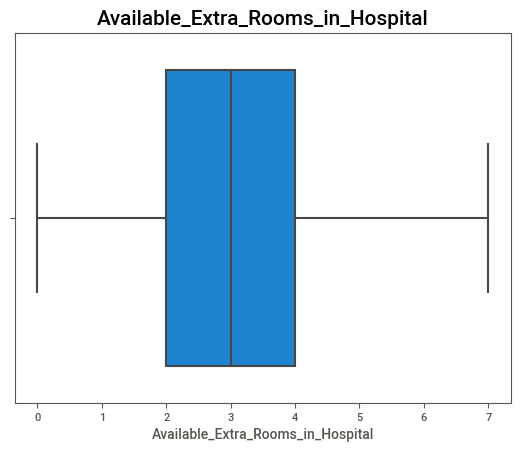

In [80]:
sns.boxplot(data.Available_Extra_Rooms_in_Hospital)
plt.title("Available_Extra_Rooms_in_Hospital",fontsize=15)
plt.show()

### Insights
* Remove the Outlier for Available_Extra_Rooms_in_Hospital
* Now there no outlier in this columns

### Reducing memory space

In [81]:
# Reduce memory space
data['Available_Extra_Rooms_in_Hospital']=pd.to_numeric(data.Available_Extra_Rooms_in_Hospital,downcast='integer')

## Department

In [82]:
# value_counts
data.Department.value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [83]:
# null value
data.Department.isnull().sum()

0

In [84]:
# Unique values
data.Department.unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [85]:
# checking datatype
data.Department.dtypes

dtype('O')

### Mannual Encoding

In [86]:
data['Department'].replace({'gynecology':1,'anesthesia':2,'radiotherapy':3,'TB & Chest disease':4,'surgery':5},inplace=True)

In [87]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z
0,8,3,3,3,3,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10,0,1
1,2,3,5,2,3,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50,0,1
2,10,5,1,2,2,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40,0,0
3,26,2,2,2,3,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50,1,0
4,26,2,2,2,3,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20,0,0
318434,24,1,1,2,2,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40,0,0
318435,7,1,4,3,1,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20,0,0
318436,11,2,2,3,2,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20,1,0


### Insights
* In Department there are 5 unique value so we used mannual encoding 
* if we use all time one-Hot encoder it may our model work show 

In [88]:
data.Department.dtypes

dtype('int64')

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  object 
 6   Ward_Facility_Code                 318438 non-null  object 
 7   Bed_Grade                          318325 non-null  float64
 8   patientid                          318438 non-null  int64  
 9   City_Code_Patient                  313906 non-null  float64
 10  Type_of_Admission                  318438 non-null  object 
 11  Severity_of_Illness                3184

## Ward_Type

In [90]:
# Value counts
data.Ward_Type.value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [91]:
# Null value
data.Ward_Type.isnull().sum()

0

In [92]:
# Datatype
data.Ward_Type.dtypes

dtype('O')

In [93]:
# Unique values
data.Ward_Type.unique()

array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object)

### Mannual Encoder

In [94]:
data['Ward_Type'].replace({'R':1,'Q':2,'S':3,'P':4,'T':5,'U':6},inplace=True)

In [95]:
data.Ward_Type.value_counts()

1    127947
2    106165
3     77794
4      5046
5      1477
6         9
Name: Ward_Type, dtype: int64

### Insights
* In Ward_Type there are 6 unique value so we used mannual encoding 
* if we use all time one-Hot encoder it may our model work show 

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  object 
 7   Bed_Grade                          318325 non-null  float64
 8   patientid                          318438 non-null  int64  
 9   City_Code_Patient                  313906 non-null  float64
 10  Type_of_Admission                  318438 non-null  object 
 11  Severity_of_Illness                3184

## Ward_Facility_Code

In [97]:
# value counts
data.Ward_Facility_Code.value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

In [98]:
# null value
data.Ward_Facility_Code.isnull().sum()

0

In [99]:
data.Ward_Facility_Code.dtypes

dtype('O')

In [100]:
data.Ward_Facility_Code.unique()

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

### Mannual Encoder

In [101]:
data['Ward_Facility_Code'].replace({'F':1,'E':2,'D':3,'C':4,'B':5,'A':6},inplace=True)

In [102]:
data.Ward_Facility_Code.value_counts()

1    112753
2     55351
3     51809
4     35463
5     35156
6     27906
Name: Ward_Facility_Code, dtype: int64

### Insights
* In Ward_Facility_Code there are 6 unique value so we used mannual encoding 
* if we use all time one-Hot encoder it may our model work show 

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  int64  
 7   Bed_Grade                          318325 non-null  float64
 8   patientid                          318438 non-null  int64  
 9   City_Code_Patient                  313906 non-null  float64
 10  Type_of_Admission                  318438 non-null  object 
 11  Severity_of_Illness                3184

##  Bed_Grade

In [104]:
# value counts
data.Bed_Grade.value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed_Grade, dtype: int64

In [105]:
# null value
data.Bed_Grade.isnull().sum()

113

* 113 data is missing we have to replace with some data

In [106]:
# datatype
data.Bed_Grade.dtypes

dtype('float64')

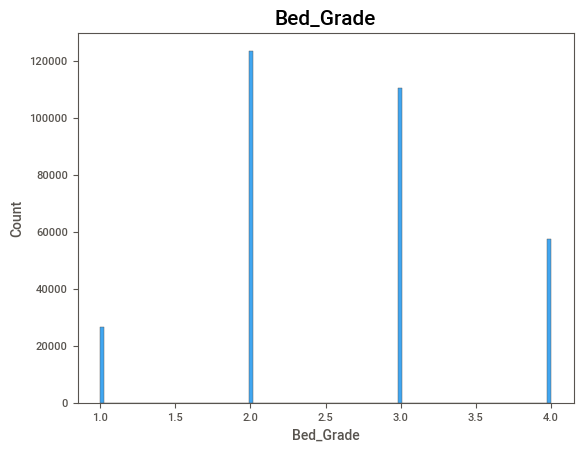

In [107]:
sns.histplot(data['Bed_Grade'])
plt.title('Bed_Grade',fontsize=15)
plt.show()

### Insights
* Bed_Grade is skewed data we used median data

In [108]:
data.loc[data['Bed_Grade'].isnull()==True,'Bed_Grade']=np.median(data.Bed_Grade.dropna(axis=0))

* Fill the null value with median because this skewed data

In [109]:
data.Bed_Grade.isnull().sum()

0

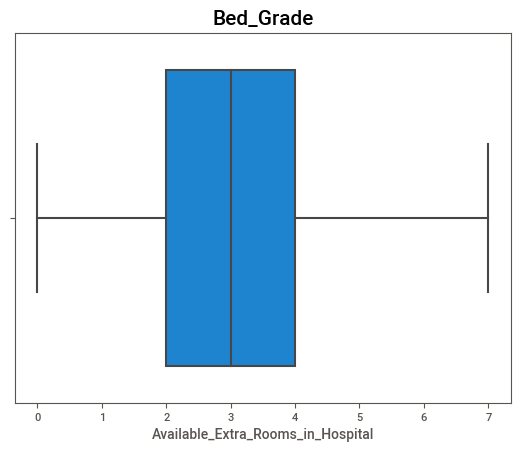

In [110]:
sns.boxplot(data.Available_Extra_Rooms_in_Hospital)
plt.title("Bed_Grade",fontsize=15)
plt.show()

### Insights
* There is no Outlier in Bed_Grade column

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  int64  
 7   Bed_Grade                          318438 non-null  float64
 8   patientid                          318438 non-null  int64  
 9   City_Code_Patient                  313906 non-null  float64
 10  Type_of_Admission                  318438 non-null  object 
 11  Severity_of_Illness                3184

### Reducing memory Space

In [112]:
# Reduce memory space
data['Bed_Grade']=pd.to_numeric(data.Bed_Grade,downcast='float')

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  int64  
 7   Bed_Grade                          318438 non-null  float32
 8   patientid                          318438 non-null  int64  
 9   City_Code_Patient                  313906 non-null  float64
 10  Type_of_Admission                  318438 non-null  object 
 11  Severity_of_Illness                3184

## patientid 

In [114]:
# value counts
data.patientid.value_counts()

66714     50
91292     43
38525     39
101359    36
33491     34
          ..
2449       1
61151      1
82611      1
129412     1
21641      1
Name: patientid, Length: 92017, dtype: int64

In [115]:
# isnull value
data.patientid.isnull().sum()

0

In [116]:
# checking datatype
data.patientid.dtypes

dtype('int64')

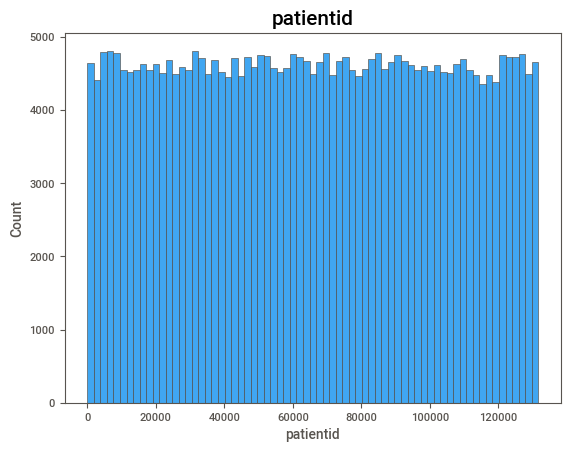

In [117]:
sns.histplot(data['patientid'])
plt.title('patientid',fontsize=15)
plt.show()

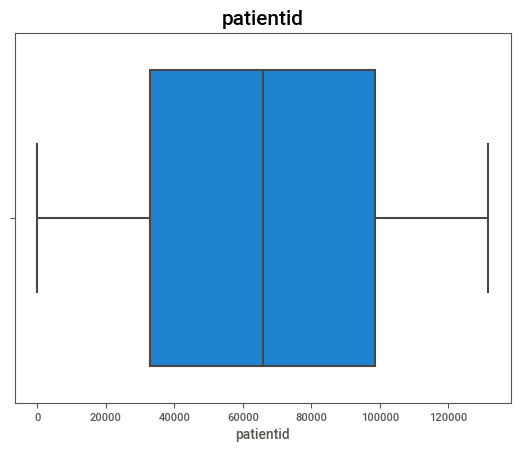

In [118]:
sns.boxplot(data['patientid'])
plt.title('patientid',fontsize=15)
plt.show()

### Reducing memory space

In [119]:
data['patientid']=pd.to_numeric(data.patientid,downcast='integer')

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  int64  
 7   Bed_Grade                          318438 non-null  float32
 8   patientid                          318438 non-null  int32  
 9   City_Code_Patient                  313906 non-null  float64
 10  Type_of_Admission                  318438 non-null  object 
 11  Severity_of_Illness                3184

## City_Code_Patient

In [121]:
# Checking value counts
data.City_Code_Patient.value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [122]:
# Null value
data.City_Code_Patient.isnull().sum()

4532

* 4532 null values there in City_Code_Patient

In [123]:
data.City_Code_Patient.unique()

array([ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14., nan, 25., 15.,
       12., 10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27.,
       22., 19., 31., 34., 32., 30., 29., 37., 33., 35., 36., 38.])

In [124]:
data.City_Code_Patient.dtypes

dtype('float64')

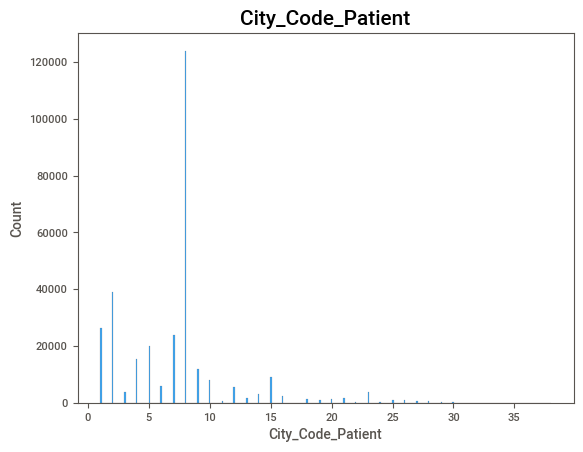

In [125]:
# Histploting the feature
sns.histplot(data['City_Code_Patient'])
plt.title('City_Code_Patient',fontsize=15)
plt.show()

### Removing null value

In [126]:
data.loc[data['City_Code_Patient'].isnull()==True,'City_Code_Patient']=np.median(data.City_Code_Patient.dropna(axis=0))

In [127]:
data.City_Code_Patient.isnull().sum()

0

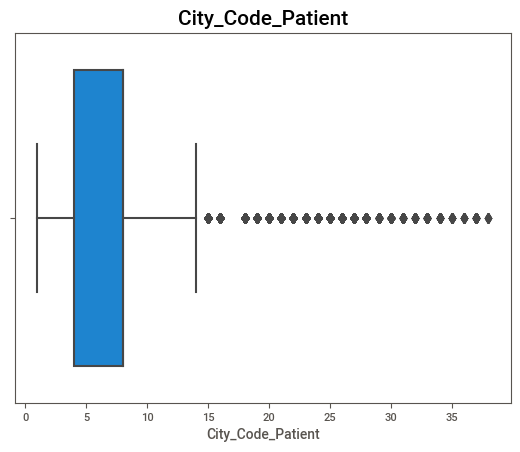

In [128]:
# Boxploting the feature
sns.boxplot(data['City_Code_Patient'])
plt.title('City_Code_Patient',fontsize=15)
plt.show()

### Insights
* In City_Code_Patient outlier is there we have to remove using **IQR**

## Handling Outlier

In [129]:
from scipy import stats
IQR=stats.iqr(data.City_Code_Patient,interpolation='midpoint')
IQR

4.0

In [130]:
Q1=data.City_Code_Patient.quantile(0.25)
print("Q1:",Q1)
Q3=data.City_Code_Patient.quantile(0.75)
print("Q3:",Q3)

max_lim=Q3+(1.5*IQR)
print('max_lim:',max_lim)
min_lim=Q1-(1.5*IQR)
print('min_lim:',min_lim)

Q1: 4.0
Q3: 8.0
max_lim: 14.0
min_lim: -2.0


In [131]:
data.loc[data['City_Code_Patient']>max_lim,'City_Code_Patient']=np.median(data.City_Code_Patient)

In [132]:
data.loc[data['City_Code_Patient']<min_lim]

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z


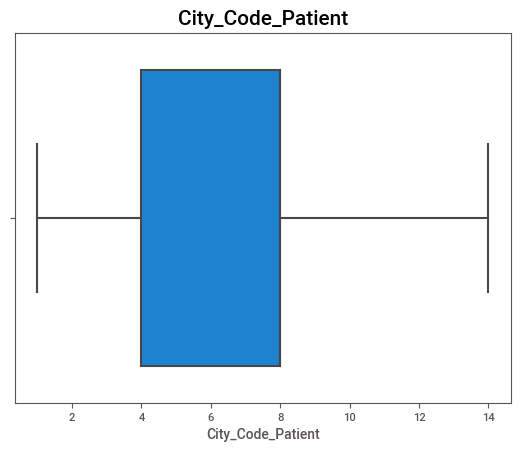

In [133]:
# Boxploting the feature
sns.boxplot(data['City_Code_Patient'])
plt.title('City_Code_Patient',fontsize=15)
plt.show()

### Insights
* Now we removed the outlier for City_Code_Patient
* using **IQR** and **Q1-Q3**

### Reducing memory space

In [134]:
data['City_Code_Patient']=pd.to_numeric(data.City_Code_Patient,downcast='float')

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  int64  
 7   Bed_Grade                          318438 non-null  float32
 8   patientid                          318438 non-null  int32  
 9   City_Code_Patient                  318438 non-null  float32
 10  Type_of_Admission                  318438 non-null  object 
 11  Severity_of_Illness                3184

## Type_of_Admission

In [136]:
# value counts
data.Type_of_Admission.value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type_of_Admission, dtype: int64

In [137]:
# Null value
data.Type_of_Admission.isnull().sum()

0

In [138]:
# unique values
data.Type_of_Admission.unique()

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

In [139]:
# datatype
data.Type_of_Admission.dtypes

dtype('O')

### One-Hot Encoder

In [140]:
Type_of_Admission=pd.get_dummies(data.Type_of_Admission,prefix='Admission',drop_first=True)

In [141]:
data=pd.concat([data,Type_of_Admission],axis=1).drop(['Type_of_Admission'],axis=1)

In [142]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z,Admission_Trauma,Admission_Urgent
0,8,3,3,3,3,1,1,2.0,31397,7.0,Extreme,2,51-60,4911,0-10,0,1,0,0
1,2,3,5,2,3,3,1,2.0,31397,7.0,Extreme,2,51-60,5954,41-50,0,1,1,0
2,10,5,1,2,2,3,2,2.0,31397,7.0,Extreme,2,51-60,4745,31-40,0,0,1,0
3,26,2,2,2,3,1,3,2.0,31397,7.0,Extreme,2,51-60,7272,41-50,1,0,1,0
4,26,2,2,2,3,3,3,2.0,31397,7.0,Extreme,2,51-60,5558,41-50,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,2,1,4.0,86499,8.0,Moderate,3,41-50,4144,Nov-20,0,0,0,0
318434,24,1,1,2,2,2,2,4.0,325,8.0,Moderate,4,81-90,6699,31-40,0,0,0,1
318435,7,1,4,3,1,1,1,4.0,125235,10.0,Minor,3,71-80,4235,Nov-20,0,0,0,0
318436,11,2,2,3,2,2,3,3.0,91081,8.0,Minor,5,Nov-20,3761,Nov-20,1,0,1,0


### Insights
* we used one-hot encoder for Type_of_Admission
* there is less unique value is there

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  int64  
 7   Bed_Grade                          318438 non-null  float32
 8   patientid                          318438 non-null  int32  
 9   City_Code_Patient                  318438 non-null  float32
 10  Severity_of_Illness                318438 non-null  object 
 11  Visitors_with_Patient              3184

## Severity_of_Illness

In [144]:
# value counts
data.Severity_of_Illness.value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity_of_Illness, dtype: int64

In [145]:
# null value
data.Severity_of_Illness.isnull().sum()

0

In [146]:
# unique values
data.Severity_of_Illness.unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [147]:
# datetype
data.Severity_of_Illness.dtypes

dtype('O')

### One-Hot Encoding

In [148]:
Severity_of_Illness=pd.get_dummies(data['Severity_of_Illness'],prefix='Illness',drop_first=True)
data=pd.concat([data,Severity_of_Illness],axis=1).drop(['Severity_of_Illness'],axis=1)

In [149]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z,Admission_Trauma,Admission_Urgent,Illness_Minor,Illness_Moderate
0,8,3,3,3,3,1,1,2.0,31397,7.0,2,51-60,4911,0-10,0,1,0,0,0,0
1,2,3,5,2,3,3,1,2.0,31397,7.0,2,51-60,5954,41-50,0,1,1,0,0,0
2,10,5,1,2,2,3,2,2.0,31397,7.0,2,51-60,4745,31-40,0,0,1,0,0,0
3,26,2,2,2,3,1,3,2.0,31397,7.0,2,51-60,7272,41-50,1,0,1,0,0,0
4,26,2,2,2,3,3,3,2.0,31397,7.0,2,51-60,5558,41-50,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,2,1,4.0,86499,8.0,3,41-50,4144,Nov-20,0,0,0,0,0,1
318434,24,1,1,2,2,2,2,4.0,325,8.0,4,81-90,6699,31-40,0,0,0,1,0,1
318435,7,1,4,3,1,1,1,4.0,125235,10.0,3,71-80,4235,Nov-20,0,0,0,0,1,0
318436,11,2,2,3,2,2,3,3.0,91081,8.0,5,Nov-20,3761,Nov-20,1,0,1,0,1,0


### Insight
* we used **One-Hot** encoder
* there is only 3 unique value is there

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  int64  
 7   Bed_Grade                          318438 non-null  float32
 8   patientid                          318438 non-null  int32  
 9   City_Code_Patient                  318438 non-null  float32
 10  Visitors_with_Patient              318438 non-null  int64  
 11  Age                                3184

## Visitors_with_Patient

In [151]:
# value counts
data.Visitors_with_Patient.value_counts()

2     138417
4      79225
3      59180
6      18860
5       9219
8       4872
7       2504
9       1358
1       1207
10      1183
12       968
11       327
16       286
14       207
15       194
13       106
24        78
20        62
18        61
0         22
17        20
22        19
19        12
25        12
21        11
23        10
32         9
30         9
Name: Visitors_with_Patient, dtype: int64

In [152]:
# isnull value
data.Visitors_with_Patient.isnull().sum()

0

In [153]:
# Unique value
data.Visitors_with_Patient.unique()

array([ 2,  4,  3,  8,  6,  7, 13,  5,  1, 10, 15, 11, 12,  9, 24, 16, 14,
       20,  0, 19, 18, 17, 23, 21, 32, 30, 22, 25], dtype=int64)

In [154]:
# Datatype
data.Visitors_with_Patient.dtypes

dtype('int64')

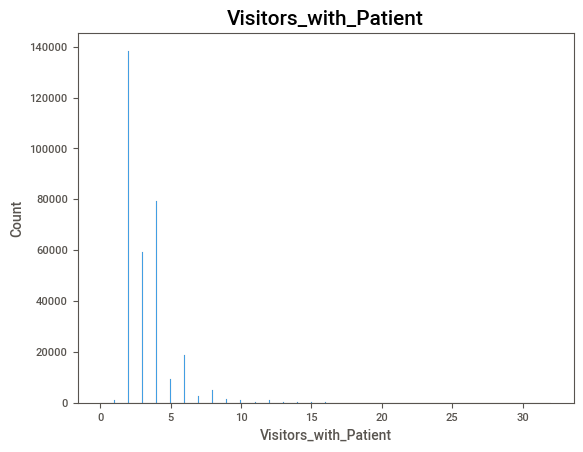

In [155]:
# histogram 
sns.histplot(data['Visitors_with_Patient'])
plt.title('Visitors_with_Patient',fontsize=15)
plt.show()


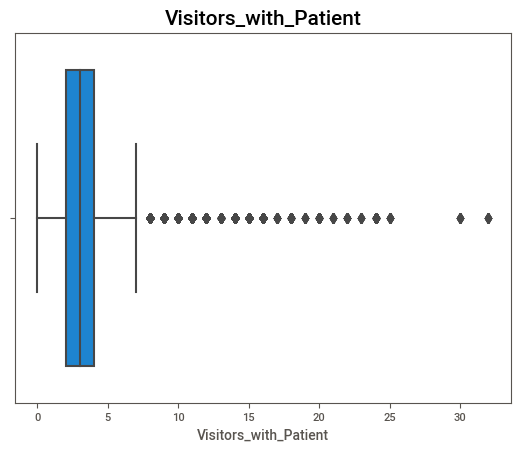

In [156]:
# Box Plot 
sns.boxplot(data['Visitors_with_Patient'])
plt.title('Visitors_with_Patient',fontsize=15)
plt.show()


### Handling Outlier

In [157]:
from scipy import stats
IQR=stats.iqr(data.Visitors_with_Patient,interpolation='midpoint')
IQR

2.0

In [158]:
Q1=data.Visitors_with_Patient.quantile(0.25)
print("Q1:",Q1)
Q3=data.Visitors_with_Patient.quantile(0.75)
print("Q3:",Q3)

min_lim=Q1-(1.5*IQR)
print("Min_lim",min_lim)
max_lim=Q3+(1.5*IQR)
print("Max_lim",max_lim)

Q1: 2.0
Q3: 4.0
Min_lim -1.0
Max_lim 7.0


In [159]:
data.loc[data['Visitors_with_Patient']>max_lim,'Visitors_with_Patient']=np.median(data.Visitors_with_Patient.dropna(axis=0))

In [160]:
data.loc[data['Visitors_with_Patient']<min_lim]

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z,Admission_Trauma,Admission_Urgent,Illness_Minor,Illness_Moderate


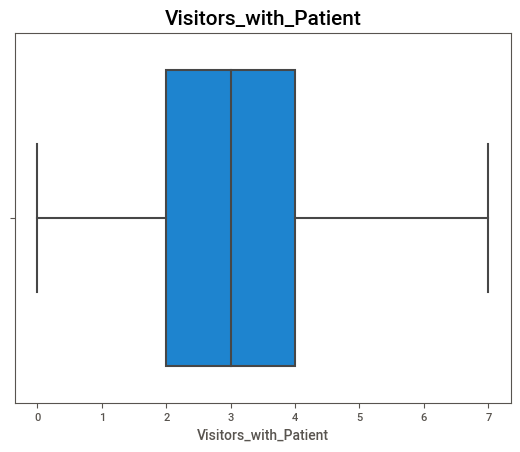

In [161]:
sns.boxplot(data['Visitors_with_Patient'])
plt.title('Visitors_with_Patient',fontsize=15)
plt.show()

* We handle outlier using **IRQ** 
* **Q3-Q1** 

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  int64  
 7   Bed_Grade                          318438 non-null  float32
 8   patientid                          318438 non-null  int32  
 9   City_Code_Patient                  318438 non-null  float32
 10  Visitors_with_Patient              318438 non-null  int64  
 11  Age                                3184

## Admission_Deposit

In [163]:
# value counts
data.Admission_Deposit.value_counts()

4469    390
4277    377
4624    350
4789    302
4970    286
       ... 
9069      1
2390      1
8752      1
8000      1
2349      1
Name: Admission_Deposit, Length: 7300, dtype: int64

In [164]:
# checking data type
data.Admission_Deposit.dtypes

dtype('int64')

In [165]:
# checking null value
data.Admission_Deposit.isnull().sum()

0

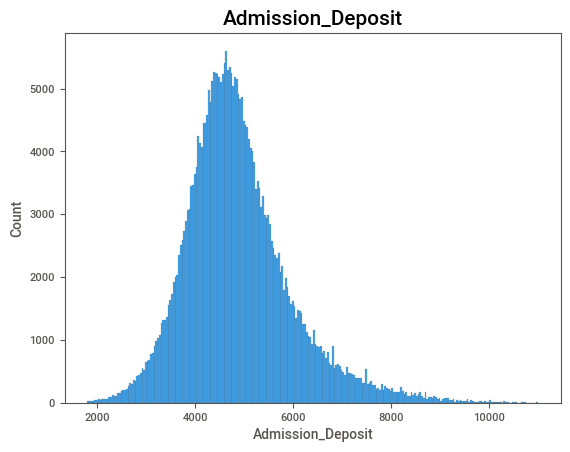

In [166]:
sns.histplot(data['Admission_Deposit'])
plt.title("Admission_Deposit",fontsize=15)
plt.show()

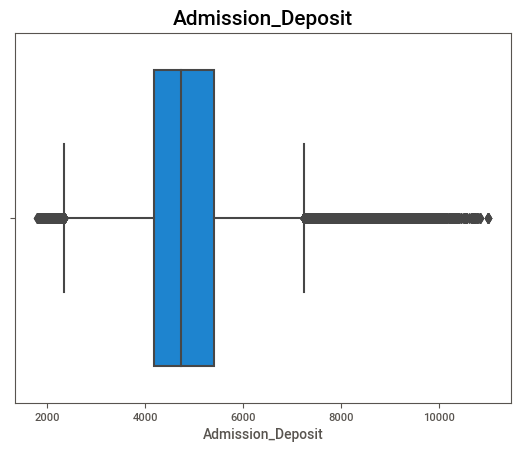

In [167]:
sns.boxplot(data['Admission_Deposit'])
plt.title('Admission_Deposit',fontsize=15)
plt.show()

### Insights
* we found so many outlier in Admission_Deposit
* W can remove this outlier but i it necessary because some people may stay more days they have to pay more money as compare to less staying patinet

## Age and Stay

In [168]:
# Age and Stay
data[['Stay','Age']]

,Stay,Age
0,0-10,51-60
1,41-50,51-60
2,31-40,51-60
3,41-50,51-60
4,41-50,51-60
...,...,...
318433,Nov-20,41-50
318434,31-40,81-90
318435,Nov-20,71-80
318436,Nov-20,Nov-20


## Age

In [169]:
# value counts
data.Age.value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
Nov-20    16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [170]:
# null value
data.Age.isnull().sum()

0

In [171]:
# unique value
data.Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       'Nov-20', '0-10', '91-100'], dtype=object)

In [172]:
# data type
data.Age.dtypes

dtype('O')

In [173]:
data['Age'].replace({'51-60':'51-60','71-80':'71-80','31-40':'31-40','41-50':'41-50','81-90':'81-90','61-70':'61-70','21-30':'21-30','Nov-20':'11-20','0-10':'0-10','91-100':'91-100'},inplace=True)

In [174]:
data.Age.value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [175]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z,Admission_Trauma,Admission_Urgent,Illness_Minor,Illness_Moderate
0,8,3,3,3,3,1,1,2.0,31397,7.0,2,51-60,4911,0-10,0,1,0,0,0,0
1,2,3,5,2,3,3,1,2.0,31397,7.0,2,51-60,5954,41-50,0,1,1,0,0,0
2,10,5,1,2,2,3,2,2.0,31397,7.0,2,51-60,4745,31-40,0,0,1,0,0,0
3,26,2,2,2,3,1,3,2.0,31397,7.0,2,51-60,7272,41-50,1,0,1,0,0,0
4,26,2,2,2,3,3,3,2.0,31397,7.0,2,51-60,5558,41-50,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,2,1,4.0,86499,8.0,3,41-50,4144,Nov-20,0,0,0,0,0,1
318434,24,1,1,2,2,2,2,4.0,325,8.0,4,81-90,6699,31-40,0,0,0,1,0,1
318435,7,1,4,3,1,1,1,4.0,125235,10.0,3,71-80,4235,Nov-20,0,0,0,0,1,0
318436,11,2,2,3,2,2,3,3.0,91081,8.0,5,11-20,3761,Nov-20,1,0,1,0,1,0


## Stay

In [176]:
# value counts
data.Stay.value_counts()

21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [177]:
data.Stay.unique()

array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [178]:
data['Stay'].replace({'0-10':'0-10','41-50':'41-50','31-40':'31-40','Nov-20':'11-20','51-60':'51-60','21-30':'21-30','71-80':'71-80','More than 100 Days':'More than 100 Days','81-90':'81-90','61-70':'61-70','91-100':'91-100'},inplace=True)

In [179]:
def get_categorical_unique(data):
    categorical_columns=[column for column in data.dtypes.index if data.dtypes[column]=='object']
    categorical_uniques={column:data[column].unique() for column in categorical_columns}
    
    return categorical_uniques


In [180]:
get_categorical_unique(data)

{'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [181]:
categorical_uniques=get_categorical_unique(data)
get_categorical_unique(data)

{'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [182]:
for column in categorical_uniques:
    categorical_uniques[column]=sorted(categorical_uniques[column])

In [183]:
categorical_uniques

{'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

In [184]:
# mapping stay
stay_mapping={value: index for index, value in enumerate(categorical_uniques['Stay'])}

In [185]:
stay_mapping

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9,
 'More than 100 Days': 10}

### Converting object datatype to numerical

In [186]:
def ordinal_encode(data,uniques):
    for column in uniques:
        data[column]=data[column].apply(lambda x: uniques[column].index(x))
ordinal_encode(data,categorical_uniques)

In [187]:
data.dtypes

Hospital_code                           int8
Hospital_type_code                     int64
City_Code_Hospital                     int64
Available_Extra_Rooms_in_Hospital       int8
Department                             int64
Ward_Type                              int64
Ward_Facility_Code                     int64
Bed_Grade                            float32
patientid                              int32
City_Code_Patient                    float32
Visitors_with_Patient                  int64
Age                                    int64
Admission_Deposit                      int64
Stay                                   int64
Hospital_region_Y                      uint8
Hospital_region_Z                      uint8
Admission_Trauma                       uint8
Admission_Urgent                       uint8
Illness_Minor                          uint8
Illness_Moderate                       uint8
dtype: object

In [188]:
data['Age']=pd.to_numeric(data.Age,downcast='integer')
data['Stay']=pd.to_numeric(data.Stay,downcast='integer')

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  int64  
 7   Bed_Grade                          318438 non-null  float32
 8   patientid                          318438 non-null  int32  
 9   City_Code_Patient                  318438 non-null  float32
 10  Visitors_with_Patient              318438 non-null  int64  
 11  Age                                3184

# Feature Selection

In [190]:
data.corr()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z,Admission_Trauma,Admission_Urgent,Illness_Minor,Illness_Moderate
Hospital_code,1.000000,0.039449,0.128294,-0.064638,0.014823,0.012135,0.132347,-0.013948,0.002291,-0.005624,-0.030385,0.016322,0.045446,0.042846,0.199212,-0.250500,-0.002291,-0.012086,-0.026442,0.005939
Hospital_type_code,0.039449,1.000000,-0.000839,-0.102539,-0.024754,0.223661,0.265768,0.018642,-0.003010,0.047532,-0.040882,0.006030,0.025341,0.058592,0.015765,0.244889,0.046488,0.044452,-0.004195,-0.001701
City_Code_Hospital,0.128294,-0.000839,1.000000,-0.040769,-0.010848,-0.040735,0.100474,-0.049248,0.000750,-0.021897,0.021167,0.020507,-0.034455,0.006381,0.216058,-0.124312,-0.038472,0.011837,-0.026229,0.011690
Available_Extra_Rooms_in_Hospital,-0.064638,-0.102539,-0.040769,1.000000,-0.091781,-0.075760,-0.053154,-0.120026,0.000897,-0.024005,0.129325,-0.138926,-0.141784,-0.124352,-0.014122,-0.000300,-0.048702,0.014017,-0.004370,0.015066
Department,0.014823,-0.024754,-0.010848,-0.091781,1.000000,0.013891,-0.014470,0.053575,0.005300,0.011024,-0.006590,0.074780,0.084338,0.000278,0.004679,-0.026300,0.015503,-0.013569,-0.037623,0.015419
Ward_Type,0.012135,0.223661,-0.040735,-0.075760,0.013891,1.000000,0.217726,-0.019193,0.000511,0.104941,0.078980,0.010017,-0.023761,0.090936,0.211891,0.055015,-0.053976,-0.006604,-0.016778,-0.002232
Ward_Facility_Code,0.132347,0.265768,0.100474,-0.053154,-0.014470,0.217726,1.000000,-0.075984,-0.001923,0.216534,-0.008746,0.000417,0.023057,0.004552,0.538828,0.150495,-0.084537,0.017306,-0.027433,0.000773
Bed_Grade,-0.013948,0.018642,-0.049248,-0.120026,0.053575,-0.019193,-0.075984,1.000000,0.001638,-0.024438,0.018183,0.001717,0.073779,0.025761,-0.101365,0.021621,0.106135,0.047094,0.254384,-0.074921
patientid,0.002291,-0.003010,0.000750,0.000897,0.005300,0.000511,-0.001923,0.001638,1.000000,0.001116,0.004885,-0.001505,-0.000877,0.001125,0.002157,-0.003291,-0.003095,0.004546,0.003805,0.001735
City_Code_Patient,-0.005624,0.047532,-0.021897,-0.024005,0.011024,0.104941,0.216534,-0.024438,0.001116,1.000000,0.008020,0.005313,0.039697,0.012577,0.218506,0.047740,-0.053223,-0.006569,0.000867,-0.011577


Text(0.5, 1.0, 'Heat map showing correlation between the feature ')

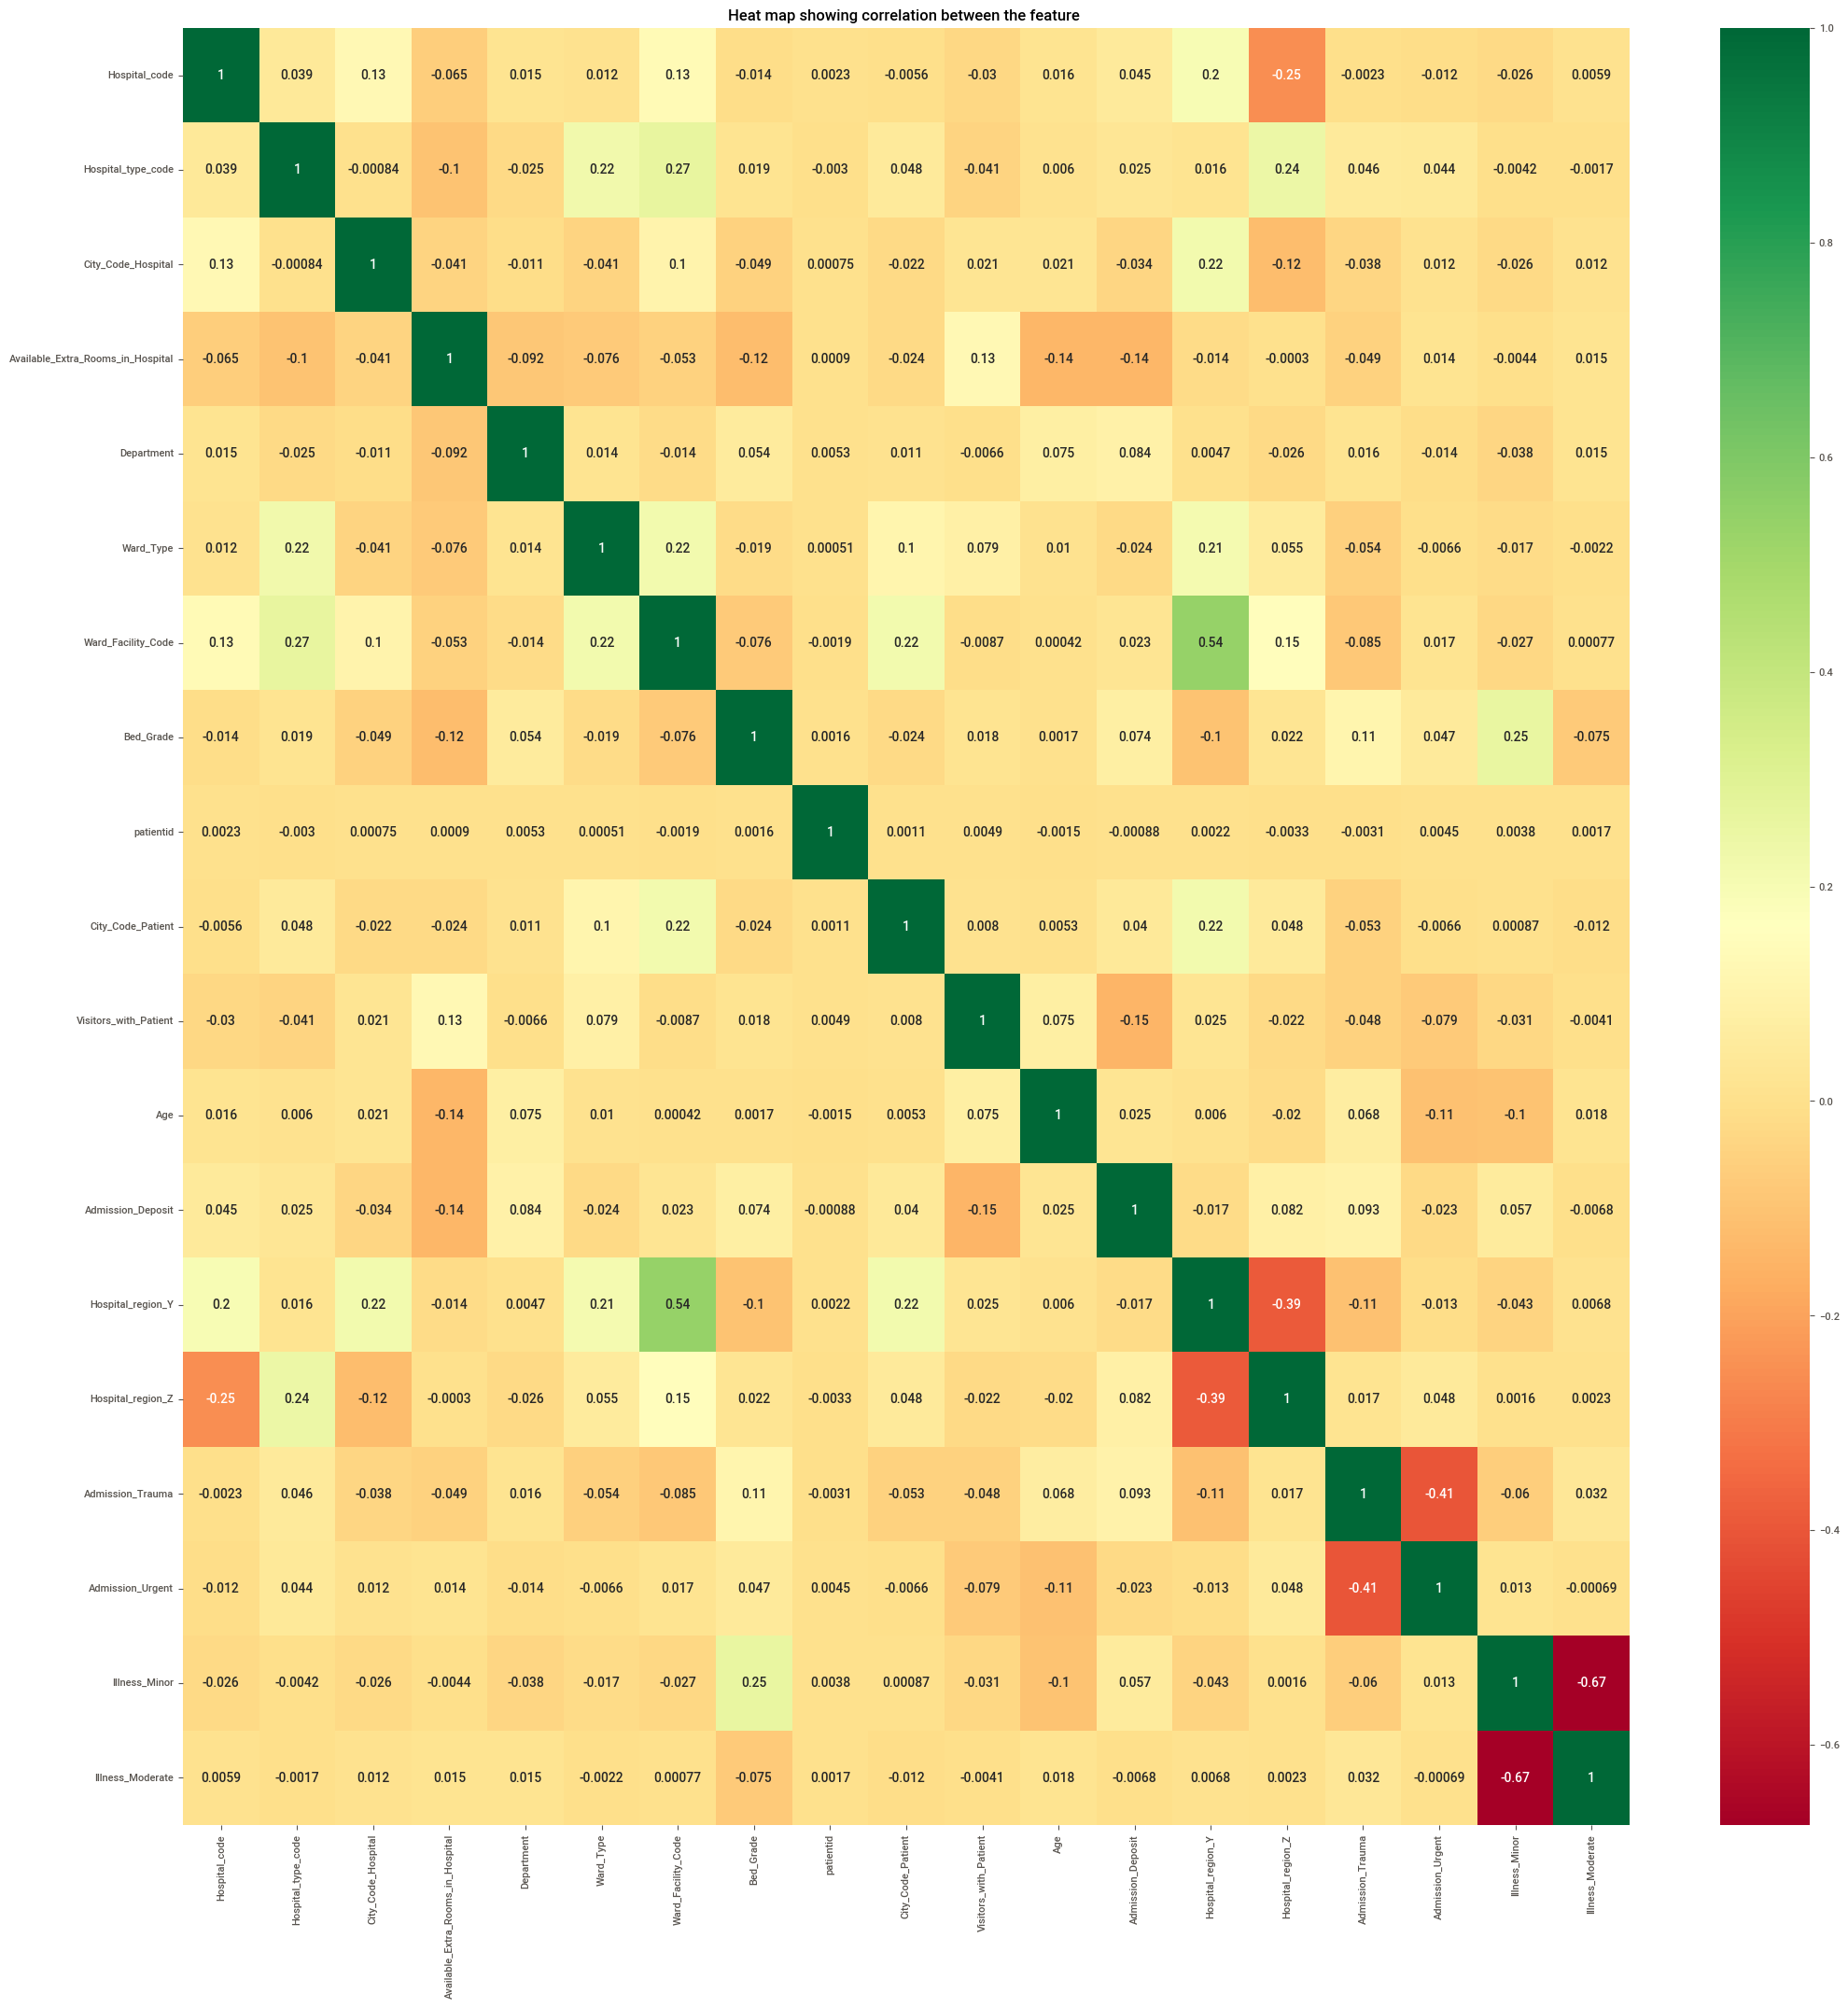

In [191]:
plt.figure(figsize=(25,25))
sns.heatmap(data.drop('Stay',axis=1).corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing correlation between the feature ")

###  Insights
* In above feature correlation all feature has less correlation with feature
* we don't need to drop any feature because of less correlation with indipendent variable

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  int64  
 7   Bed_Grade                          318438 non-null  float32
 8   patientid                          318438 non-null  int32  
 9   City_Code_Patient                  318438 non-null  float32
 10  Visitors_with_Patient              318438 non-null  int64  
 11  Age                                3184

### Duplicates

In [193]:
data.drop_duplicates(inplace=True)

# Data Analysis Report

## Introduction

-This data analysis report based on a dataset containing information about Health care Stay. The dataset includes features such as the 'Hospital_code','Hospital_type_code','City_Code_Hospital','Available_Extra_Rooms_in_Hospital','Department', 'Ward_Type',
       'Ward_Facility_Code', 'Bed_Grade', 'patientid', 'City_Code_Patient',
       'Visitors_with_Patient', 'Age', 'Admission_Deposit', 'Stay',
       'Hospital_region_Y', 'Hospital_region_Z', 'Admission_Trauma',
       'Admission_Urgent', 'Illness_Minor', 'Illness_Moderate' and addition information. The dataset consists of 318438 records

## Data Summary

Here is a summary of the statistics and charecteriatics of the dataset

* **Total Records:** 318438
* **Feature**:
  * Hospital_code
  * Hospital_type_code
  * City_Code_Hospital
  * Available_Extra_Rooms_in_Hospital','Department
  * Ward_Type
  * Ward_Facility_Code
  * patientid
  * City_Code_Patient
  * Visitors_with_Patient
  * Age
  * Admission_Deposit
  * Stay
  * Hospital_region_Y
  * Hospital_region_Z
  * Admission_Trauma
  * Admission_Urgent
  * Illness_Minor
  * Illness_Moderate
  
## Unique Values
  * **Hospital_code**: 33 unique codes
  * **Hospital_type_code**: 17 unique type of code
  * **City_Code_Hospital**: 11 unique city code
  * **Available_Extra_Rooms_in_Hospital**:18 inique rooms
  * **Department**: 6 unique Department
  * **Ward_Type**: 6 unique ward type
  * **Ward_Facility_Code**: 6 unique ward facility
  * **patientid**: 92017 different patient id
  * **City_Code_Patient**: 50 unique city code
  * **Visitors_with_Patient**: 30 unique visitors with patient
  * **Age**:10 different type age patient
  * **Admission_Deposit**: 3 unqiue type of admmision
  * **Stay**: 11 unique days patient will stay
  * **Severity_of_Illness**: 3 unique type of Severity_of_Illness
  
 ## Conclusion

This data analysis report provides an overview of the given Hospital staying journey dataset. It highlights the most common values for various features and provides insights into the dataset's characteristics. Further analysis, such as data cleaning and feature engineering, may be necessary for more in-depth analysis and modeling. Additionally, it's important to address missing or unspecified information in the dataset for more accurate analysis and predictions.
  

# Task 2:- Create a machine learning model to predict the length of stay (in days) of apatient entering the Hospital, given various factors about their stay.

### Feature Selection using Random Forest Regressor

        Hospital_code  Hospital_type_code  City_Code_Hospital  \
0                   8                   3                   3   
1                   2                   3                   5   
2                  10                   5                   1   
3                  26                   2                   2   
4                  26                   2                   2   
...               ...                 ...                 ...   
318433              6                   1                   6   
318434             24                   1                   1   
318435              7                   1                   4   
318436             11                   2                   2   
318437             19                   1                   7   

        Available_Extra_Rooms_in_Hospital  Department  Ward_Type  \
0                                       3           3          1   
1                                       2           3          3   
2              

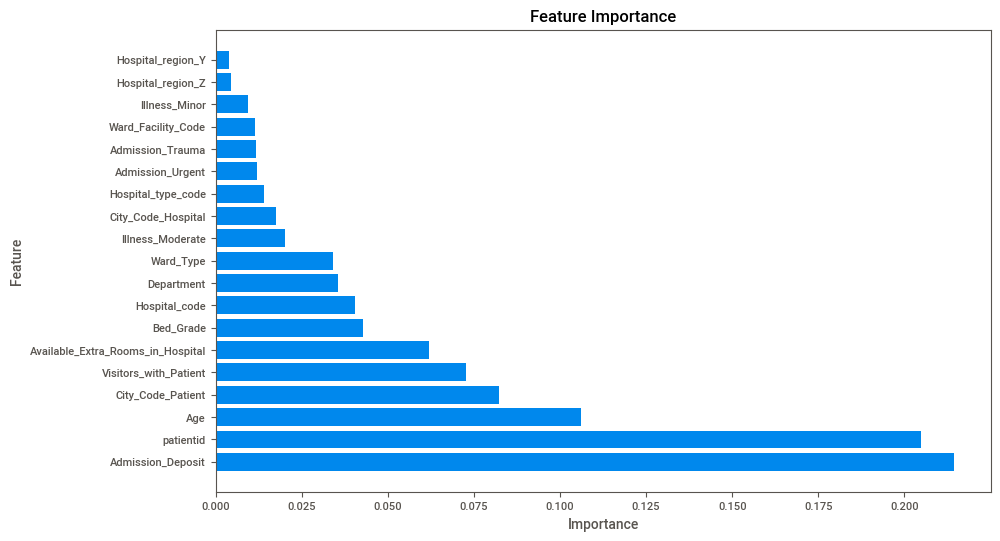

In [194]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a Dataframe named 'data'
# Extract feature and target variable
feature=data.drop('Stay',axis=1)
target=data['Stay']

# convert categorical variable to dummy/indicator variable (if needed)
feature=pd.get_dummies(feature)
print(feature)
# initialize a Random Forest Regressor
RF1_model=RandomForestClassifier(random_state=42)
RF1_model.fit(feature,target)

# Get feature importance
feature_importance=RF1_model.feature_importances_

#create a Dataframe to display feature importance
feature_importances_data=pd.DataFrame({
    'Feature':feature.columns,
    'Importance':feature_importance
})

# sort the DataFrame by importance in descending order
feature_importances_data=feature_importances_data.sort_values(by='Importance',ascending=False)

# Display the feature importance Dataframe
print(feature_importances_data)

#plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importances_data['Feature'],feature_importances_data['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Insights
* Here we used feature Enginnering method like Random Feature classifier
* We got how many feature are very crucial for model prediction
* Based on this result we may have to select feature

In [195]:
data1=data.drop(['Hospital_region_Z','Hospital_region_Z',],axis=1)

## Model Creation

In [196]:
# Split data into train and test
from sklearn.model_selection import train_test_split

In [197]:
# drop traget columns for x variable
# select target variable for y variable
x=data1.drop('Stay',axis=1)
y=data1.Stay

In [198]:
data1

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Admission_Trauma,Admission_Urgent,Illness_Minor,Illness_Moderate
0,8,3,3,3,3,1,1,2.0,31397,7.0,2,5,4911,0,0,0,0,0,0
1,2,3,5,2,3,3,1,2.0,31397,7.0,2,5,5954,4,0,1,0,0,0
2,10,5,1,2,2,3,2,2.0,31397,7.0,2,5,4745,3,0,1,0,0,0
3,26,2,2,2,3,1,3,2.0,31397,7.0,2,5,7272,4,1,1,0,0,0
4,26,2,2,2,3,3,3,2.0,31397,7.0,2,5,5558,4,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,2,1,4.0,86499,8.0,3,4,4144,1,0,0,0,0,1
318434,24,1,1,2,2,2,2,4.0,325,8.0,4,8,6699,3,0,0,1,0,1
318435,7,1,4,3,1,1,1,4.0,125235,10.0,3,7,4235,1,0,0,0,1,0
318436,11,2,2,3,2,2,3,3.0,91081,8.0,5,1,3761,1,1,1,0,1,0


In [199]:
y.value_counts()

2     87488
1     78135
3     55152
5     35000
0     23599
4     11743
7     10246
10     6666
8      4836
9      2764
6      2744
Name: Stay, dtype: int64

In [200]:
# Balancing the Data
from collections import Counter
from imblearn.over_sampling import SMOTE

sm=SMOTE()
print(Counter(y))
x_sm,y_sm=sm.fit_resample(x,y)
print(Counter(y_sm))

Counter({2: 87488, 1: 78135, 3: 55152, 5: 35000, 0: 23599, 4: 11743, 7: 10246, 10: 6666, 8: 4836, 9: 2764, 6: 2744})
Counter({0: 87488, 4: 87488, 3: 87488, 1: 87488, 5: 87488, 2: 87488, 7: 87488, 10: 87488, 8: 87488, 6: 87488, 9: 87488})


### Dimensionality Reduction:

In [202]:
# split train and test data for model training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(254698, 18)
(63675, 18)
(254698,)
(63675,)


# Model Building

# 1)Logistic Legression

In [203]:
from sklearn.feature_selection import SelectKBest,f_classif
k=17
selector=SelectKBest(f_classif,k=k)
x_train_selected=selector.fit_transform(x_train,y_train)
x_test_selected=selector.transform(x_test)

In [204]:
x_test_selected

array([[26.,  2.,  2., ...,  0.,  0.,  0.],
       [11.,  2.,  2., ...,  0.,  0.,  0.],
       [26.,  2.,  2., ...,  0.,  1.,  0.],
       ...,
       [28.,  2., 11., ...,  0.,  0.,  0.],
       [13.,  1.,  5., ...,  0.,  1.,  0.],
       [27.,  1.,  7., ...,  1.,  1.,  0.]])

In [205]:
x_train_selected

array([[32.,  6.,  9., ...,  0.,  0.,  0.],
       [14.,  1.,  1., ...,  0.,  1.,  0.],
       [23.,  1.,  6., ...,  0.,  0.,  1.],
       ...,
       [23.,  1.,  6., ...,  0.,  0.,  1.],
       [ 9.,  4.,  5., ...,  1.,  0.,  1.],
       [14.,  1.,  1., ...,  0.,  0.,  1.]])

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix
# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model1=LogisticRegression()
model1.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_LR=model1.predict(X_test_scaled)
Y_train_LR=model1.predict(X_train_scaled)


## Model Evaluation

In [207]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_LR,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_LR, Y_test))

print("\nAccuracy Score:")
LR=accuracy_score(Y_test_LR, Y_test)
print(LR)

Confusion matrix:
[[13940    32]
 [ 9062 27906]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75     13972
         1.0       1.00      0.75      0.86     36968

    accuracy                           0.82     50940
   macro avg       0.80      0.88      0.81     50940
weighted avg       0.89      0.82      0.83     50940


Accuracy Score:
0.8214762465645857


In [208]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_LR,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_LR, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_LR, Y_train))

Confusion matrix:
[[ 55323    138]
 [ 35776 112521]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75     55461
         1.0       1.00      0.76      0.86    148297

    accuracy                           0.82    203758
   macro avg       0.80      0.88      0.81    203758
weighted avg       0.89      0.82      0.83    203758


Accuracy Score:
0.823741889888986


### Report

* Logistic regression is used for classifiation problems.


* In logistic regression training accuracy is 82% and testing accuracy is 82% 

# 2) Decision Tree

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model2=DecisionTreeClassifier()
model2.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_tree=model2.predict(X_test_scaled)
Y_train_tree=model2.predict(X_train_scaled)

## Model Evaluation

In [210]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_tree,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_tree, Y_test))

print("\nAccuracy Score:")
print(accuracy_score(Y_test_tree, Y_test))

Confusion matrix:
[[16944  6591]
 [ 6058 21347]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     23535
         1.0       0.76      0.78      0.77     27405

    accuracy                           0.75     50940
   macro avg       0.75      0.75      0.75     50940
weighted avg       0.75      0.75      0.75     50940


Accuracy Score:
0.7516882606988614


In [211]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_tree,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_tree, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_tree, Y_train))

Confusion matrix:
[[ 91099     42]
 [     0 112617]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91141
         1.0       1.00      1.00      1.00    112617

    accuracy                           1.00    203758
   macro avg       1.00      1.00      1.00    203758
weighted avg       1.00      1.00      1.00    203758


Accuracy Score:
0.999793873124


### Report

* Decision tree is used for both classification and regrssion problems.


* In Decision tree, training accuracy is 99% and testing accuracy is 75% therefore it is overfit because traing accuracy is high and testing accuracy is low.

# Knn- K Nearest Neighbours

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model4=KNeighborsClassifier()
model4.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_Knn=model4.predict(X_test_scaled)
Y_train_Knn=model4.predict(X_train_scaled)

## Model Evaluation

In [216]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_Knn,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_Knn, Y_test))

print("\nAccuracy Score:")
KNN=accuracy_score(Y_test_Knn, Y_test)
print(KNN)

Confusion matrix:
[[15712  2287]
 [ 7290 25651]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.87      0.77     17999
         1.0       0.92      0.78      0.84     32941

    accuracy                           0.81     50940
   macro avg       0.80      0.83      0.80     50940
weighted avg       0.84      0.81      0.82     50940


Accuracy Score:
0.8119945033372595


In [217]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_Knn,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_Knn, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_Knn, Y_train))

Confusion matrix:
[[ 67246   4954]
 [ 23853 107705]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82     72200
         1.0       0.96      0.82      0.88    131558

    accuracy                           0.86    203758
   macro avg       0.85      0.88      0.85    203758
weighted avg       0.88      0.86      0.86    203758


Accuracy Score:
0.8586215019778365


### Report

* KNN is used for both classification and regrssion problems.


* In KNN, training accuracy is 85% and testing accuracy is 81%.

# Gradient Boosting

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,classification_report

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model4=GradientBoostingClassifier()
model4.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_GR=model4.predict(X_test_scaled)
Y_train_GR=model4.predict(X_train_scaled)

## Model evaluation

In [219]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_GR,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_GR,Y_test))

print("\nAccuracy Score:")
GD=accuracy_score(Y_test_GR,Y_test)
print(GD)

Confusion matrix:
[[15475   751]
 [ 7527 27187]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.95      0.79     16226
         1.0       0.97      0.78      0.87     34714

    accuracy                           0.84     50940
   macro avg       0.82      0.87      0.83     50940
weighted avg       0.88      0.84      0.84     50940


Accuracy Score:
0.8374950922654103


In [220]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_GR,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_GR, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_GR, Y_train))

Confusion matrix:
[[ 61425   2887]
 [ 29674 109772]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79     64312
         1.0       0.97      0.79      0.87    139446

    accuracy                           0.84    203758
   macro avg       0.82      0.87      0.83    203758
weighted avg       0.88      0.84      0.85    203758


Accuracy Score:
0.8401976854896495


### Report

* Gradient boosting is used for the combination of high predictive accuracy, flexibility, robustness, interpretability, and availability of efficient implementations.


* In Gradient boosting ,training accuracy is 84% and testing accuracy is 83%.

# Ensemple Method

In [221]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Define your individual classifiers
logistic = LogisticRegression()
tree = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
Graient_B = GradientBoostingClassifier()
Random = RandomForestClassifier()

# Create a list of tuples for the estimators
estimators = [('lr', logistic), ('tree', tree), ('knn', KNN), ('Gradient', Graient_B), ('Random', Random)]

# Create the VotingClassifier instance
voting_classifier = VotingClassifier(estimators)

# Now, fit the VotingClassifier
voting_classifier.fit(X_train_scaled, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('Gradient', GradientBoostingClassifier()),
                             ('Random', RandomForestClassifier())])

In [222]:
Y_train_ensemble=voting_classifier.predict(X_train_scaled)
Y_test_ensemble=voting_classifier.predict(X_test_scaled)

In [223]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_ensemble,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_ensemble,Y_test))

print("\nAccuracy Score:")
Ensemble=accuracy_score(Y_test_ensemble,Y_test)
print(Ensemble)

Confusion matrix:
[[15303   710]
 [ 7699 27228]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.78     16013
         1.0       0.97      0.78      0.87     34927

    accuracy                           0.83     50940
   macro avg       0.82      0.87      0.83     50940
weighted avg       0.88      0.83      0.84     50940


Accuracy Score:
0.8349234393404005


In [224]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_ensemble,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_ensemble, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_ensemble, Y_train))

Confusion matrix:
[[ 68676     53]
 [ 22423 112606]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86     68729
         1.0       1.00      0.83      0.91    135029

    accuracy                           0.89    203758
   macro avg       0.88      0.92      0.88    203758
weighted avg       0.92      0.89      0.89    203758


Accuracy Score:
0.8896926746434496


### Report

* Ensemble methods are used in machine learning to enhance predictive accuracy by combining multiple models, mitigating individual weaknesses and exploiting diverse perspectives, resulting in more robust and reliable predictions across various datasets and problem domains.


* In ensemble methods ,training accuracy is 88% and testing accuracy is 83%.

# Hyper parameter Tunning

## Hyper parameter tuning on Decision tree 

### Grid SearchCV

In [225]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# defining parameter range
param_grid={
    'criterion':('gini','entropy'),
    'splitter':('best','random'),
    'max_depth':(list(range(10,30))),
    'min_samples_split':[2,5,3,7,1,6,15],
    'min_samples_leaf':list(range(10,20)),
}

tree_clf=DecisionTreeClassifier(random_state=3)
tree_cv=GridSearchCV(tree_clf,param_grid,scoring='f1',n_jobs=-1,verbose=1,cv=3)

tree_cv.fit(X_train,Y_train)
best_params=tree_cv.best_params_
print(f'Best Parameters:{best_params}')

Fitting 3 folds for each of 5600 candidates, totalling 16800 fits
Best Parameters:{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'random'}


In [226]:
DT=DecisionTreeClassifier(criterion= 'entropy',
                          max_depth=11,
                          min_samples_leaf= 18,
                          min_samples_split= 2,
                          splitter= 'random')
DT.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=18,
                       splitter='random')

In [227]:
y_train_DT=DT.predict(X_train)
y_test_DT=DT.predict(X_test)

In [228]:
y_train_acc=accuracy_score(y_train_DT,Y_train)
print(y_train_acc)
DC=accuracy_score(y_test_DT,Y_test)
print(DC)

0.8415276946181254
0.837004318806439


### Insights

* GridSearchCV is employed in machine learning to systematically explore a predefined hyperparameter grid, optimizing model performance by selecting the best combination of hyperparameters through exhaustive search, thereby automating the process of parameter tuning for improved model accuracy and generalization.

* GridSearchCV is used on decision tree in this model because to reduce the overfitting. 
* In GridSearchCV training accuracy is 84% and testing accuracy is 83%.

# Comparisions:

In logistic regression training accuracy is 82% and testing accuracy is 82% 

In Decision tree, training accuracy is 99% and testing accuracy is 75%

In KNN, training accuracy is 85% and testing accuracy is 81%.

In ensemble methods ,training accuracy is 88% and testing accuracy is 83%

In GridSearchCV on decision tree, training accuracy is 84% and testing accuracy is 83%.


From this we can say that ensemble method and GridSearchCV on decision tree yields highest accuracy on training as well as testing data.

## CONCLUSION:

The utilization of GridSearchCV on decision tree and ensemble method yields notably high accuracy scores on train and test data , indicating thier efficacy in the healthcare applications. These findings underscore the potential of optimizied machine learning models to enhance diagnostics , treatment planning and patient outcomes.Further exploration and integration of these methodologies could significantly advance healthcare pactices,fostering more precise and efficient medical interventions.